In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd drive/My\ Drive/COMP4641\ Project/LSTM/

/content/drive/My Drive/COMP4641 Project/LSTM


In [0]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import sklearn 
import sklearn.metrics
import superfile as sf
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
%ls

Chi-squared.ipynb                  __pycache__/
Logistic_Regression.ipynb          race_feature_added.csv
LSTM-all.ipynb                     scot_lstm_timeseries_data.csv
lstm_timeseries_data.csv           superfile.py
maricopa_lstm_timeseries_data.csv  tempe_lstm_timeseries_data.csv
mesa_lstm_timeseries_data.csv      Untitled0-copy.ipynb
phoenix_lstm_timeseries_data.csv   Untitled0.ipynb


In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## All Cities

In [0]:
all_cities_df = pd.read_csv('lstm_timeseries_data.csv').drop(['Unnamed: 0'],axis=1)
all_cities_dataloader = sf.CustomDataLoader(all_cities_df)
x_all,y_all = all_cities_dataloader.resampledData()
data_all_dicts = sf.generate_dict(x_all,y_all,device)

5511 2471


In [0]:
all_cities_df

,date,stars,user_stars,rate,reviews,race_1,race_2,race_3,race_4,race_5
0,2013 mid,3.0,3.518421,-5,0.750000,-5.69,0.16,-0.06,-0.24,0.10
1,2014,3.0,3.518421,-3,1.000000,-6.76,0.18,0.06,-0.16,0.06
2,2014 mid,3.0,3.518421,0,0.500000,-6.53,0.17,0.03,-0.33,0.01
3,2015,3.0,3.518421,-1,0.000000,-6.30,0.16,0.00,-0.50,-0.04
4,2015 mid,3.0,3.518421,0,0.000000,-6.30,0.16,0.00,-0.50,-0.04
...,...,...,...,...,...,...,...,...,...,...
39905,2013 mid,4.0,3.880000,5,0.916667,-5.69,0.16,-0.06,-0.24,0.10
39906,2014,4.0,3.880000,-9,1.000000,-6.76,0.18,0.06,-0.16,0.06
39907,2014 mid,4.0,3.880000,-1,1.000000,-6.53,0.17,0.03,-0.33,0.01
39908,2015,4.0,3.880000,1,1.000000,-6.30,0.16,0.00,-0.50,-0.04


In [0]:
all_cities_df.head(10)

,date,stars,user_stars,rate,reviews,race_1,race_2,race_3,race_4,race_5
0,2013 mid,3.0,3.518421,-5,0.750000,-5.69,0.16,-0.06,-0.24,0.10
1,2014,3.0,3.518421,-3,1.000000,-6.76,0.18,0.06,-0.16,0.06
2,2014 mid,3.0,3.518421,0,0.500000,-6.53,0.17,0.03,-0.33,0.01
3,2015,3.0,3.518421,-1,0.000000,-6.30,0.16,0.00,-0.50,-0.04
4,2015 mid,3.0,3.518421,0,0.000000,-6.30,0.16,0.00,-0.50,-0.04
5,2013 mid,4.0,3.815511,-5,0.861111,8.76,-0.19,0.19,0.06,-0.90
6,2014,4.0,3.815511,7,0.888889,8.54,-0.22,0.06,0.24,-0.74
7,2014 mid,4.0,3.815511,-6,0.944444,7.67,-0.18,-0.12,-0.03,-0.29
8,2015,4.0,3.815511,-2,1.000000,6.80,-0.14,-0.30,-0.30,0.16
9,2015 mid,4.0,3.815511,1,1.000000,6.80,-0.14,-0.30,-0.30,0.16


In [0]:
all_trainables_dictionary = {}
for hs in hidden_sizes:
  all_trainables_dictionary[hs] = sf.Trainable(data_all_dicts,device,hs=hs)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [0]:
all_acc_list = []

for hs in hidden_sizes:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n')
  all_trainables_dictionary[hs].train()
  print('\n-----Training Complete-----\n')
  all_acc_list.append(all_trainables_dictionary[hs].test_printout())



-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.29519
Epoch: 1, loss: 0.29122
Epoch: 2, loss: 0.28790
Epoch: 3, loss: 0.28682
Epoch: 4, loss: 0.29158
Epoch: 5, loss: 0.28622
Epoch: 6, loss: 0.28858
Epoch: 7, loss: 0.27915
Epoch: 8, loss: 0.28332
Epoch: 9, loss: 0.28676

-----Training Complete-----

[[956 119]
 [796 334]]
accuracy:  0.5850340136054422
Report
               precision    recall  f1-score   support

         0.0       0.55      0.89      0.68      1075
         1.0       0.74      0.30      0.42      1130

    accuracy                           0.59      2205
   macro avg       0.64      0.59      0.55      2205
weighted avg       0.64      0.59      0.55      2205


-----Start Training-----
-----Hidden Size: 8 -----



Epoch: 0, loss: 0.29980
Epoch: 1, loss: 0.28541
Epoch: 2, loss: 0.28884
Epoch: 3, loss: 0.28885
Epoch: 4, loss: 0.28703
Epoch: 5, loss: 0.29203
Epoch: 6, loss: 0.28674
Epoch: 7, loss: 0.28385
Epoch: 8, loss: 0.28486
Epoch: 9, loss: 0.28568

-----Training Complete-----

[[923 152]
 [758 372]]
accuracy:  0.5873015873015873
Report
               precision    recall  f1-score   support

         0.0       0.55      0.86      0.67      1075
         1.0       0.71      0.33      0.45      1130

    accuracy                           0.59      2205
   macro avg       0.63      0.59      0.56      2205
weighted avg       0.63      0.59      0.56      2205


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.29623
Epoch: 1, loss: 0.29041
Epoch: 2, loss: 0.29268
Epoch: 3, loss: 0.29311
Epoch: 4, loss: 0.28781
Epoch: 5, loss: 0.29153
Epoch: 6, loss: 0.28619
Epoch: 7, loss: 0.29150
Epoch: 8, loss: 0.28274
Epoch: 9, loss: 0.28317

-----Training Complete-----

[[984  91]
 [862 268]]
accuracy:  0.5678004535147392
Report
               precision    recall  f1-score   support

         0.0       0.53      0.92      0.67      1075
         1.0       0.75      0.24      0.36      1130

    accuracy                           0.57      2205
   macro avg       0.64      0.58      0.52      2205
weighted avg       0.64      0.57      0.51      2205


-----Start Training-----
-----Hidden Size: 32 -----



Epoch: 0, loss: 0.29828
Epoch: 1, loss: 0.29452
Epoch: 2, loss: 0.28999
Epoch: 3, loss: 0.28434
Epoch: 4, loss: 0.28603
Epoch: 5, loss: 0.28473
Epoch: 6, loss: 0.28516
Epoch: 7, loss: 0.28521
Epoch: 8, loss: 0.28403
Epoch: 9, loss: 0.28384

-----Training Complete-----

[[929 146]
 [751 379]]
accuracy:  0.5931972789115646
Report
               precision    recall  f1-score   support

         0.0       0.55      0.86      0.67      1075
         1.0       0.72      0.34      0.46      1130

    accuracy                           0.59      2205
   macro avg       0.64      0.60      0.57      2205
weighted avg       0.64      0.59      0.56      2205


-----Start Training-----
-----Hidden Size: 64 -----



Epoch: 0, loss: 0.29765
Epoch: 1, loss: 0.29688
Epoch: 2, loss: 0.28754
Epoch: 3, loss: 0.28968
Epoch: 4, loss: 0.29019
Epoch: 5, loss: 0.29095
Epoch: 6, loss: 0.28496
Epoch: 7, loss: 0.28946
Epoch: 8, loss: 0.28328
Epoch: 9, loss: 0.28726

-----Training Complete-----

[[893 182]
 [722 408]]
accuracy:  0.5900226757369614
Report
               precision    recall  f1-score   support

         0.0       0.55      0.83      0.66      1075
         1.0       0.69      0.36      0.47      1130

    accuracy                           0.59      2205
   macro avg       0.62      0.60      0.57      2205
weighted avg       0.62      0.59      0.57      2205


-----Start Training-----
-----Hidden Size: 128 -----



Epoch: 0, loss: 0.29709
Epoch: 1, loss: 0.29288
Epoch: 2, loss: 0.28855
Epoch: 3, loss: 0.28704
Epoch: 4, loss: 0.28826
Epoch: 5, loss: 0.29262
Epoch: 6, loss: 0.28625
Epoch: 7, loss: 0.28965
Epoch: 8, loss: 0.28920
Epoch: 9, loss: 0.28711

-----Training Complete-----

[[947 128]
 [773 357]]
accuracy:  0.5913832199546485
Report
               precision    recall  f1-score   support

         0.0       0.55      0.88      0.68      1075
         1.0       0.74      0.32      0.44      1130

    accuracy                           0.59      2205
   macro avg       0.64      0.60      0.56      2205
weighted avg       0.65      0.59      0.56      2205


-----Start Training-----
-----Hidden Size: 256 -----



Epoch: 0, loss: 0.29876
Epoch: 1, loss: 0.29409
Epoch: 2, loss: 0.29010
Epoch: 3, loss: 0.29127
Epoch: 4, loss: 0.28751
Epoch: 5, loss: 0.28574
Epoch: 6, loss: 0.28770
Epoch: 7, loss: 0.28675
Epoch: 8, loss: 0.28427
Epoch: 9, loss: 0.28503

-----Training Complete-----

[[933 142]
 [744 386]]
accuracy:  0.5981859410430839
Report
               precision    recall  f1-score   support

         0.0       0.56      0.87      0.68      1075
         1.0       0.73      0.34      0.47      1130

    accuracy                           0.60      2205
   macro avg       0.64      0.60      0.57      2205
weighted avg       0.65      0.60      0.57      2205


-----Start Training-----
-----Hidden Size: 512 -----



Epoch: 0, loss: 0.30012
Epoch: 1, loss: 0.29481
Epoch: 2, loss: 0.28358
Epoch: 3, loss: 0.28987
Epoch: 4, loss: 0.29234
Epoch: 5, loss: 0.29109
Epoch: 6, loss: 0.28752
Epoch: 7, loss: 0.28314
Epoch: 8, loss: 0.29220
Epoch: 9, loss: 0.28337

-----Training Complete-----

[[981  94]
 [849 281]]
accuracy:  0.5723356009070295
Report
               precision    recall  f1-score   support

         0.0       0.54      0.91      0.68      1075
         1.0       0.75      0.25      0.37      1130

    accuracy                           0.57      2205
   macro avg       0.64      0.58      0.52      2205
weighted avg       0.65      0.57      0.52      2205



In [0]:
all_acc_list

[0.5850340136054422,
 0.5873015873015873,
 0.5678004535147392,
 0.5931972789115646,
 0.5900226757369614,
 0.5913832199546485,
 0.5981859410430839,
 0.5723356009070295]

In [0]:
all_trainables_dictionary2 = {}

for l in ls:
  all_trainables_dictionary2[l] = sf.Trainable(data_all_dicts,device,n_layers=l)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [0]:
all_acc_list2 = []

for l in ls:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",l,'-----\n')
  all_trainables_dictionary[l].train()
  print('\n-----Training Complete-----\n')
  all_acc_list2.append(all_trainables_dictionary2[l].test_printout())



-----Start Training-----
-----Hidden Size: 1 -----



KeyError: ignored

## Cities

In [0]:
cities = [
  'phoenix',
  'scot',
  'mesa',
  'tempe',
  'maricopa'
]
all_dfs = {}

for city in cities:
  all_dfs[city] = pd.read_csv(city+'_lstm_timeseries_data.csv').drop(['Unnamed: 0'],axis=1)

In [0]:
device = 'cuda:0'

In [0]:
# create all dataloader
# 3 main functions
#
# 1. getData -> loads the raw data in (X,y) format
# 2. resampledData -> loads the resampled data in (X,y) format
# 3. batchData -> loads the batched data in (X,y) format
all_dataLoader = {}
for city in cities:
  all_dataLoader[city] = sf.CustomDataLoader(all_dfs[city])
  


In [0]:
all_data_dicts = {}
for city in cities:
  x,y =all_dataLoader[city].resampledData()
  all_data_dicts[city] = sf.generate_dict(x,y,device)

2545 1165
857 336
738 318
636 260
735 392


In [0]:
# hs
hidden_sizes = [
    4,
    8,
    16,
    32,
    64,
    128,
    256,
    512
]

In [0]:
all_trainable_dicts = {}
for city in cities:
  dict_hs = {}
  for hs in hidden_sizes:
    dict_hs[hs] = sf.Trainable(all_data_dicts[city],device,hs=hs)
  all_trainable_dicts[city] = dict_hs

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


## Phoenix

In [0]:
def plotgraph(acc_list,title):
  x = np.array(hidden_sizes)
  y = np.array(acc_list)
  plt.title(title)
  plt.xlabel('Hidden Size')
  plt.ylabel('Accuracy')
  plt.plot(x,y,'s-')

In [0]:
accuracy_list = []
for hs in hidden_sizes:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n')
  all_trainable_dicts['phoenix'][hs].train()
  print('\n-----Training Complete-----\n')
  accuracy_list.append(all_trainable_dicts['phoenix'][hs].test_printout())



-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.28869
Epoch: 1, loss: 0.29068
Epoch: 2, loss: 0.28983
Epoch: 3, loss: 0.28529
Epoch: 4, loss: 0.29211
Epoch: 5, loss: 0.28510
Epoch: 6, loss: 0.29059
Epoch: 7, loss: 0.28521
Epoch: 8, loss: 0.28584
Epoch: 9, loss: 0.28860

-----Training Complete-----

[[432  44]
 [422 120]]
accuracy:  0.5422396856581533
Report
               precision    recall  f1-score   support

         0.0       0.51      0.91      0.65       476
         1.0       0.73      0.22      0.34       542

    accuracy                           0.54      1018
   macro avg       0.62      0.56      0.49      1018
weighted avg       0.63      0.54      0.48      1018


-----Start Training-----
-----Hidden Size: 8 -----



Epoch: 0, loss: 0.30070
Epoch: 1, loss: 0.29192
Epoch: 2, loss: 0.29629
Epoch: 3, loss: 0.29292
Epoch: 4, loss: 0.29782
Epoch: 5, loss: 0.29101
Epoch: 6, loss: 0.29603
Epoch: 7, loss: 0.28659
Epoch: 8, loss: 0.28641
Epoch: 9, loss: 0.28518

-----Training Complete-----

[[392  84]
 [366 176]]
accuracy:  0.5579567779960707
Report
               precision    recall  f1-score   support

         0.0       0.52      0.82      0.64       476
         1.0       0.68      0.32      0.44       542

    accuracy                           0.56      1018
   macro avg       0.60      0.57      0.54      1018
weighted avg       0.60      0.56      0.53      1018


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.29584
Epoch: 1, loss: 0.27843
Epoch: 2, loss: 0.28681
Epoch: 3, loss: 0.29007
Epoch: 4, loss: 0.28781
Epoch: 5, loss: 0.28924
Epoch: 6, loss: 0.28528
Epoch: 7, loss: 0.28794
Epoch: 8, loss: 0.29113
Epoch: 9, loss: 0.28639

-----Training Complete-----

[[395  81]
 [376 166]]
accuracy:  0.5510805500982319
Report
               precision    recall  f1-score   support

         0.0       0.51      0.83      0.63       476
         1.0       0.67      0.31      0.42       542

    accuracy                           0.55      1018
   macro avg       0.59      0.57      0.53      1018
weighted avg       0.60      0.55      0.52      1018


-----Start Training-----
-----Hidden Size: 32 -----



Epoch: 0, loss: 0.29621
Epoch: 1, loss: 0.29129
Epoch: 2, loss: 0.29112
Epoch: 3, loss: 0.28232
Epoch: 4, loss: 0.28834
Epoch: 5, loss: 0.28896
Epoch: 6, loss: 0.28743
Epoch: 7, loss: 0.28605
Epoch: 8, loss: 0.28490
Epoch: 9, loss: 0.27999

-----Training Complete-----

[[413  63]
 [406 136]]
accuracy:  0.5392927308447937
Report
               precision    recall  f1-score   support

         0.0       0.50      0.87      0.64       476
         1.0       0.68      0.25      0.37       542

    accuracy                           0.54      1018
   macro avg       0.59      0.56      0.50      1018
weighted avg       0.60      0.54      0.49      1018


-----Start Training-----
-----Hidden Size: 64 -----



Epoch: 0, loss: 0.30178
Epoch: 1, loss: 0.29162
Epoch: 2, loss: 0.29047
Epoch: 3, loss: 0.29005
Epoch: 4, loss: 0.28964
Epoch: 5, loss: 0.28695
Epoch: 6, loss: 0.28783
Epoch: 7, loss: 0.28545
Epoch: 8, loss: 0.27971
Epoch: 9, loss: 0.28589

-----Training Complete-----

[[415  61]
 [392 150]]
accuracy:  0.5550098231827112
Report
               precision    recall  f1-score   support

         0.0       0.51      0.87      0.65       476
         1.0       0.71      0.28      0.40       542

    accuracy                           0.56      1018
   macro avg       0.61      0.57      0.52      1018
weighted avg       0.62      0.56      0.51      1018


-----Start Training-----
-----Hidden Size: 128 -----



Epoch: 0, loss: 0.29793
Epoch: 1, loss: 0.28923
Epoch: 2, loss: 0.28948
Epoch: 3, loss: 0.28752
Epoch: 4, loss: 0.28972
Epoch: 5, loss: 0.29069
Epoch: 6, loss: 0.29130
Epoch: 7, loss: 0.28373
Epoch: 8, loss: 0.28253
Epoch: 9, loss: 0.29264

-----Training Complete-----

[[412  64]
 [389 153]]
accuracy:  0.5550098231827112
Report
               precision    recall  f1-score   support

         0.0       0.51      0.87      0.65       476
         1.0       0.71      0.28      0.40       542

    accuracy                           0.56      1018
   macro avg       0.61      0.57      0.52      1018
weighted avg       0.62      0.56      0.52      1018


-----Start Training-----
-----Hidden Size: 256 -----



Epoch: 0, loss: 0.29685
Epoch: 1, loss: 0.28957
Epoch: 2, loss: 0.28871
Epoch: 3, loss: 0.29249
Epoch: 4, loss: 0.28451
Epoch: 5, loss: 0.28565
Epoch: 6, loss: 0.29049
Epoch: 7, loss: 0.29430
Epoch: 8, loss: 0.28170
Epoch: 9, loss: 0.29430

-----Training Complete-----

[[417  59]
 [396 146]]
accuracy:  0.5530451866404715
Report
               precision    recall  f1-score   support

         0.0       0.51      0.88      0.65       476
         1.0       0.71      0.27      0.39       542

    accuracy                           0.55      1018
   macro avg       0.61      0.57      0.52      1018
weighted avg       0.62      0.55      0.51      1018


-----Start Training-----
-----Hidden Size: 512 -----



Epoch: 0, loss: 0.30249
Epoch: 1, loss: 0.29209
Epoch: 2, loss: 0.28965
Epoch: 3, loss: 0.28916
Epoch: 4, loss: 0.29344
Epoch: 5, loss: 0.28710
Epoch: 6, loss: 0.28403
Epoch: 7, loss: 0.28375
Epoch: 8, loss: 0.28997
Epoch: 9, loss: 0.28291

-----Training Complete-----

[[411  65]
 [389 153]]
accuracy:  0.5540275049115914
Report
               precision    recall  f1-score   support

         0.0       0.51      0.86      0.64       476
         1.0       0.70      0.28      0.40       542

    accuracy                           0.55      1018
   macro avg       0.61      0.57      0.52      1018
weighted avg       0.61      0.55      0.52      1018



In [0]:
accuracy_list = [
   0.5422396856581533,
   0.5579567779960707,
   0.5510805500982319,
   0.5392927308447937,
   0.5550098231827112,
   0.5550098231827112,
   0.5530451866404715,
   0.5540275049115914
]

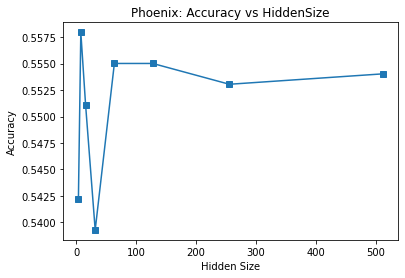

In [0]:
plotgraph(accuracy_list,'Phoenix: Accuracy vs HiddenSize')

In [0]:
print(hidden_sizes)

[4, 8, 16, 32, 64, 128, 256, 512]


In [0]:
accuracy_list2 = []
for hs in hidden_sizes:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n')
  all_trainable_dicts['scot'][hs].train()
  print('\n-----Training Complete-----\n')
  accuracy_list2.append(all_trainable_dicts['scot'][hs].test_printout())



-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.40083
Epoch: 1, loss: 0.30012
Epoch: 2, loss: 0.29125
Epoch: 3, loss: 0.29243
Epoch: 4, loss: 0.29855
Epoch: 5, loss: 0.29114
Epoch: 6, loss: 0.28477
Epoch: 7, loss: 0.28854
Epoch: 8, loss: 0.28700
Epoch: 9, loss: 0.28288

-----Training Complete-----

[[151  21]
 [125  46]]
accuracy:  0.5743440233236151
Report
               precision    recall  f1-score   support

         0.0       0.55      0.88      0.67       172
         1.0       0.69      0.27      0.39       171

    accuracy                           0.57       343
   macro avg       0.62      0.57      0.53       343
weighted avg       0.62      0.57      0.53       343


-----Start Training-----
-----Hidden Size: 8 -----



Epoch: 0, loss: 0.32032
Epoch: 1, loss: 0.28819
Epoch: 2, loss: 0.29528
Epoch: 3, loss: 0.29494
Epoch: 4, loss: 0.28292
Epoch: 5, loss: 0.28248
Epoch: 6, loss: 0.28164
Epoch: 7, loss: 0.27976
Epoch: 8, loss: 0.27932
Epoch: 9, loss: 0.27760

-----Training Complete-----

[[153  19]
 [134  37]]
accuracy:  0.5539358600583091
Report
               precision    recall  f1-score   support

         0.0       0.53      0.89      0.67       172
         1.0       0.66      0.22      0.33       171

    accuracy                           0.55       343
   macro avg       0.60      0.55      0.50       343
weighted avg       0.60      0.55      0.50       343


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.31351
Epoch: 1, loss: 0.30877
Epoch: 2, loss: 0.28545
Epoch: 3, loss: 0.29892
Epoch: 4, loss: 0.29817
Epoch: 5, loss: 0.28530
Epoch: 6, loss: 0.28142
Epoch: 7, loss: 0.28530
Epoch: 8, loss: 0.28793
Epoch: 9, loss: 0.28736

-----Training Complete-----

[[153  19]
 [123  48]]
accuracy:  0.5860058309037901
Report
               precision    recall  f1-score   support

         0.0       0.55      0.89      0.68       172
         1.0       0.72      0.28      0.40       171

    accuracy                           0.59       343
   macro avg       0.64      0.59      0.54       343
weighted avg       0.64      0.59      0.54       343


-----Start Training-----
-----Hidden Size: 32 -----



Epoch: 0, loss: 0.32081
Epoch: 1, loss: 0.30440
Epoch: 2, loss: 0.29511
Epoch: 3, loss: 0.28945
Epoch: 4, loss: 0.27922
Epoch: 5, loss: 0.27989
Epoch: 6, loss: 0.28906
Epoch: 7, loss: 0.28576
Epoch: 8, loss: 0.27719
Epoch: 9, loss: 0.29306

-----Training Complete-----

[[151  21]
 [124  47]]
accuracy:  0.577259475218659
Report
               precision    recall  f1-score   support

         0.0       0.55      0.88      0.68       172
         1.0       0.69      0.27      0.39       171

    accuracy                           0.58       343
   macro avg       0.62      0.58      0.53       343
weighted avg       0.62      0.58      0.53       343


-----Start Training-----
-----Hidden Size: 64 -----



Epoch: 0, loss: 0.30711
Epoch: 1, loss: 0.29018
Epoch: 2, loss: 0.29160
Epoch: 3, loss: 0.28124
Epoch: 4, loss: 0.28741
Epoch: 5, loss: 0.27937
Epoch: 6, loss: 0.29971
Epoch: 7, loss: 0.28730
Epoch: 8, loss: 0.28527
Epoch: 9, loss: 0.28723

-----Training Complete-----

[[154  18]
 [127  44]]
accuracy:  0.577259475218659
Report
               precision    recall  f1-score   support

         0.0       0.55      0.90      0.68       172
         1.0       0.71      0.26      0.38       171

    accuracy                           0.58       343
   macro avg       0.63      0.58      0.53       343
weighted avg       0.63      0.58      0.53       343


-----Start Training-----
-----Hidden Size: 128 -----



Epoch: 0, loss: 0.31111
Epoch: 1, loss: 0.29354
Epoch: 2, loss: 0.27774
Epoch: 3, loss: 0.29511
Epoch: 4, loss: 0.28101
Epoch: 5, loss: 0.29216
Epoch: 6, loss: 0.28700
Epoch: 7, loss: 0.28587
Epoch: 8, loss: 0.29582
Epoch: 9, loss: 0.29409

-----Training Complete-----

[[152  20]
 [125  46]]
accuracy:  0.577259475218659
Report
               precision    recall  f1-score   support

         0.0       0.55      0.88      0.68       172
         1.0       0.70      0.27      0.39       171

    accuracy                           0.58       343
   macro avg       0.62      0.58      0.53       343
weighted avg       0.62      0.58      0.53       343


-----Start Training-----
-----Hidden Size: 256 -----



Epoch: 0, loss: 0.30948
Epoch: 1, loss: 0.29604
Epoch: 2, loss: 0.29757
Epoch: 3, loss: 0.29119
Epoch: 4, loss: 0.29386
Epoch: 5, loss: 0.29431
Epoch: 6, loss: 0.28999
Epoch: 7, loss: 0.30125
Epoch: 8, loss: 0.29376
Epoch: 9, loss: 0.28300

-----Training Complete-----

[[136  36]
 [106  65]]
accuracy:  0.5860058309037901
Report
               precision    recall  f1-score   support

         0.0       0.56      0.79      0.66       172
         1.0       0.64      0.38      0.48       171

    accuracy                           0.59       343
   macro avg       0.60      0.59      0.57       343
weighted avg       0.60      0.59      0.57       343


-----Start Training-----
-----Hidden Size: 512 -----



Epoch: 0, loss: 0.32066
Epoch: 1, loss: 0.30881
Epoch: 2, loss: 0.29557
Epoch: 3, loss: 0.29945
Epoch: 4, loss: 0.29569
Epoch: 5, loss: 0.29638
Epoch: 6, loss: 0.28674
Epoch: 7, loss: 0.27955
Epoch: 8, loss: 0.29197
Epoch: 9, loss: 0.28711

-----Training Complete-----

[[131  41]
 [107  64]]
accuracy:  0.5685131195335277
Report
               precision    recall  f1-score   support

         0.0       0.55      0.76      0.64       172
         1.0       0.61      0.37      0.46       171

    accuracy                           0.57       343
   macro avg       0.58      0.57      0.55       343
weighted avg       0.58      0.57      0.55       343



In [0]:
accuracy_list2=[
  0.5743440233236151,
  0.5539358600583091,
  0.5860058309037901,
  0.577259475218659,
  0.577259475218659,
  0.577259475218659,
  0.5860058309037901,
  0.5685131195335277         
]

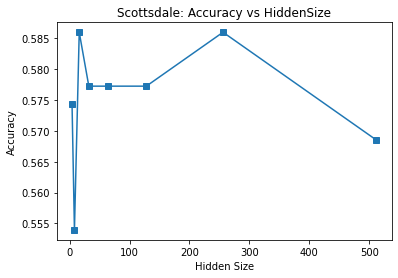

In [0]:
plotgraph(accuracy_list2,'Scottsdale: Accuracy vs HiddenSize')

In [0]:
accuracy_list3 = []
for hs in hidden_sizes:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n')
  all_trainable_dicts['mesa'][hs].train()
  print('\n-----Training Complete-----\n')
  accuracy_list3.append(all_trainable_dicts['mesa'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.31196
Epoch: 1, loss: 0.29830
Epoch: 2, loss: 0.29094
Epoch: 3, loss: 0.27496
Epoch: 4, loss: 0.29076
Epoch: 5, loss: 0.29435
Epoch: 6, loss: 0.28746
Epoch: 7, loss: 0.28830
Epoch: 8, loss: 0.28682
Epoch: 9, loss: 0.27305

-----Training Complete-----

[[127  16]
 [110  43]]
accuracy:  0.5743243243243243
Report
               precision    recall  f1-score   support

         0.0       0.54      0.89      0.67       143
         1.0       0.73      0.28      0.41       153

    accuracy                           0.57       296
   macro avg       0.63      0.58      0.54       296
weighted avg       0.64      0.57      0.53       296


-----Start Training-----
-----Hidden Size: 8 -----



Epoch: 0, loss: 0.29940
Epoch: 1, loss: 0.29996
Epoch: 2, loss: 0.28935
Epoch: 3, loss: 0.29738
Epoch: 4, loss: 0.27394
Epoch: 5, loss: 0.28922
Epoch: 6, loss: 0.29334
Epoch: 7, loss: 0.28090
Epoch: 8, loss: 0.28680
Epoch: 9, loss: 0.27344

-----Training Complete-----

[[127  16]
 [102  51]]
accuracy:  0.6013513513513513
Report
               precision    recall  f1-score   support

         0.0       0.55      0.89      0.68       143
         1.0       0.76      0.33      0.46       153

    accuracy                           0.60       296
   macro avg       0.66      0.61      0.57       296
weighted avg       0.66      0.60      0.57       296


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.32458
Epoch: 1, loss: 0.29862
Epoch: 2, loss: 0.29112
Epoch: 3, loss: 0.28650
Epoch: 4, loss: 0.28326
Epoch: 5, loss: 0.28131
Epoch: 6, loss: 0.27628
Epoch: 7, loss: 0.29084
Epoch: 8, loss: 0.28503
Epoch: 9, loss: 0.27722

-----Training Complete-----

[[136   7]
 [129  24]]
accuracy:  0.5405405405405406
Report
               precision    recall  f1-score   support

         0.0       0.51      0.95      0.67       143
         1.0       0.77      0.16      0.26       153

    accuracy                           0.54       296
   macro avg       0.64      0.55      0.46       296
weighted avg       0.65      0.54      0.46       296


-----Start Training-----
-----Hidden Size: 32 -----



Epoch: 0, loss: 0.29887
Epoch: 1, loss: 0.29117
Epoch: 2, loss: 0.28936
Epoch: 3, loss: 0.29820
Epoch: 4, loss: 0.28623
Epoch: 5, loss: 0.27991
Epoch: 6, loss: 0.28980
Epoch: 7, loss: 0.27791
Epoch: 8, loss: 0.27678
Epoch: 9, loss: 0.28036

-----Training Complete-----

[[125  18]
 [116  37]]
accuracy:  0.5472972972972973
Report
               precision    recall  f1-score   support

         0.0       0.52      0.87      0.65       143
         1.0       0.67      0.24      0.36       153

    accuracy                           0.55       296
   macro avg       0.60      0.56      0.50       296
weighted avg       0.60      0.55      0.50       296


-----Start Training-----
-----Hidden Size: 64 -----



Epoch: 0, loss: 0.30482
Epoch: 1, loss: 0.29742
Epoch: 2, loss: 0.28977
Epoch: 3, loss: 0.28762
Epoch: 4, loss: 0.28501
Epoch: 5, loss: 0.27916
Epoch: 6, loss: 0.28336
Epoch: 7, loss: 0.29272
Epoch: 8, loss: 0.28155
Epoch: 9, loss: 0.28333

-----Training Complete-----

[[125  18]
 [102  51]]
accuracy:  0.5945945945945946
Report
               precision    recall  f1-score   support

         0.0       0.55      0.87      0.68       143
         1.0       0.74      0.33      0.46       153

    accuracy                           0.59       296
   macro avg       0.64      0.60      0.57       296
weighted avg       0.65      0.59      0.56       296


-----Start Training-----
-----Hidden Size: 128 -----



Epoch: 0, loss: 0.31080
Epoch: 1, loss: 0.30301
Epoch: 2, loss: 0.28537
Epoch: 3, loss: 0.28403
Epoch: 4, loss: 0.29146
Epoch: 5, loss: 0.28388
Epoch: 6, loss: 0.28917
Epoch: 7, loss: 0.28673
Epoch: 8, loss: 0.28278
Epoch: 9, loss: 0.29009

-----Training Complete-----

[[141   2]
 [145   8]]
accuracy:  0.5033783783783784
Report
               precision    recall  f1-score   support

         0.0       0.49      0.99      0.66       143
         1.0       0.80      0.05      0.10       153

    accuracy                           0.50       296
   macro avg       0.65      0.52      0.38       296
weighted avg       0.65      0.50      0.37       296


-----Start Training-----
-----Hidden Size: 256 -----



Epoch: 0, loss: 0.31363
Epoch: 1, loss: 0.29652
Epoch: 2, loss: 0.29235
Epoch: 3, loss: 0.29092
Epoch: 4, loss: 0.29733
Epoch: 5, loss: 0.29171
Epoch: 6, loss: 0.28451
Epoch: 7, loss: 0.30236
Epoch: 8, loss: 0.28290
Epoch: 9, loss: 0.28203

-----Training Complete-----

[[124  19]
 [ 91  62]]
accuracy:  0.6283783783783784
Report
               precision    recall  f1-score   support

         0.0       0.58      0.87      0.69       143
         1.0       0.77      0.41      0.53       153

    accuracy                           0.63       296
   macro avg       0.67      0.64      0.61       296
weighted avg       0.67      0.63      0.61       296


-----Start Training-----
-----Hidden Size: 512 -----



Epoch: 0, loss: 0.31408
Epoch: 1, loss: 0.29073
Epoch: 2, loss: 0.30500
Epoch: 3, loss: 0.29880
Epoch: 4, loss: 0.29474
Epoch: 5, loss: 0.28416
Epoch: 6, loss: 0.30599
Epoch: 7, loss: 0.30009
Epoch: 8, loss: 0.28550
Epoch: 9, loss: 0.29441

-----Training Complete-----

[[133  10]
 [118  35]]
accuracy:  0.5675675675675675
Report
               precision    recall  f1-score   support

         0.0       0.53      0.93      0.68       143
         1.0       0.78      0.23      0.35       153

    accuracy                           0.57       296
   macro avg       0.65      0.58      0.51       296
weighted avg       0.66      0.57      0.51       296



In [0]:
accuracy_list3=[
    0.5743243243243243,
    0.6013513513513513,
    0.5405405405405406,
    0.5472972972972973,
    0.5945945945945946,
    0.5033783783783784,
    0.6283783783783784,
    0.5675675675675675            
]

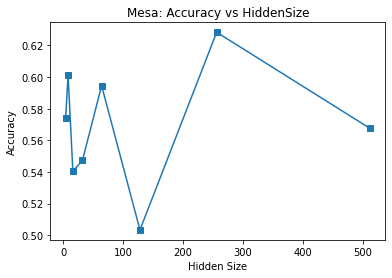

In [0]:
plotgraph(accuracy_list3,'Mesa: Accuracy vs HiddenSize')

In [0]:
accuracy_list4 = []
for hs in hidden_sizes:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n')
  all_trainable_dicts['tempe'][hs].train()
  print('\n-----Training Complete-----\n')
  accuracy_list4.append(all_trainable_dicts['tempe'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.40478
Epoch: 1, loss: 0.28810
Epoch: 2, loss: 0.29496
Epoch: 3, loss: 0.29577
Epoch: 4, loss: 0.28048
Epoch: 5, loss: 0.27481
Epoch: 6, loss: 0.26888
Epoch: 7, loss: 0.29210
Epoch: 8, loss: 0.27230
Epoch: 9, loss: 0.27428

-----Training Complete-----

[[108  17]
 [ 96  34]]
accuracy:  0.5568627450980392
Report
               precision    recall  f1-score   support

         0.0       0.53      0.86      0.66       125
         1.0       0.67      0.26      0.38       130

    accuracy                           0.56       255
   macro avg       0.60      0.56      0.52       255
weighted avg       0.60      0.56      0.51       255


-----Start Training-----
-----Hidden Size: 8 -----



Epoch: 0, loss: 0.30541
Epoch: 1, loss: 0.30145
Epoch: 2, loss: 0.28926
Epoch: 3, loss: 0.28673
Epoch: 4, loss: 0.27688
Epoch: 5, loss: 0.28079
Epoch: 6, loss: 0.28697
Epoch: 7, loss: 0.27186
Epoch: 8, loss: 0.28935
Epoch: 9, loss: 0.26270

-----Training Complete-----

[[100  25]
 [ 86  44]]
accuracy:  0.5647058823529412
Report
               precision    recall  f1-score   support

         0.0       0.54      0.80      0.64       125
         1.0       0.64      0.34      0.44       130

    accuracy                           0.56       255
   macro avg       0.59      0.57      0.54       255
weighted avg       0.59      0.56      0.54       255


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.30672
Epoch: 1, loss: 0.28572
Epoch: 2, loss: 0.28284
Epoch: 3, loss: 0.28372
Epoch: 4, loss: 0.28301
Epoch: 5, loss: 0.27430
Epoch: 6, loss: 0.27994
Epoch: 7, loss: 0.26880
Epoch: 8, loss: 0.26707
Epoch: 9, loss: 0.26589

-----Training Complete-----

[[108  17]
 [ 90  40]]
accuracy:  0.5803921568627451
Report
               precision    recall  f1-score   support

         0.0       0.55      0.86      0.67       125
         1.0       0.70      0.31      0.43       130

    accuracy                           0.58       255
   macro avg       0.62      0.59      0.55       255
weighted avg       0.63      0.58      0.55       255


-----Start Training-----
-----Hidden Size: 32 -----



Epoch: 0, loss: 0.30173
Epoch: 1, loss: 0.29533
Epoch: 2, loss: 0.28544
Epoch: 3, loss: 0.27300
Epoch: 4, loss: 0.29405
Epoch: 5, loss: 0.28108
Epoch: 6, loss: 0.27967
Epoch: 7, loss: 0.28069
Epoch: 8, loss: 0.27039
Epoch: 9, loss: 0.26587

-----Training Complete-----

[[110  15]
 [ 99  31]]
accuracy:  0.5529411764705883
Report
               precision    recall  f1-score   support

         0.0       0.53      0.88      0.66       125
         1.0       0.67      0.24      0.35       130

    accuracy                           0.55       255
   macro avg       0.60      0.56      0.51       255
weighted avg       0.60      0.55      0.50       255


-----Start Training-----
-----Hidden Size: 64 -----



Epoch: 0, loss: 0.30261
Epoch: 1, loss: 0.30011
Epoch: 2, loss: 0.28557
Epoch: 3, loss: 0.28462
Epoch: 4, loss: 0.27961
Epoch: 5, loss: 0.29192
Epoch: 6, loss: 0.28208
Epoch: 7, loss: 0.29174
Epoch: 8, loss: 0.28357
Epoch: 9, loss: 0.28498

-----Training Complete-----

[[100  25]
 [ 79  51]]
accuracy:  0.592156862745098
Report
               precision    recall  f1-score   support

         0.0       0.56      0.80      0.66       125
         1.0       0.67      0.39      0.50       130

    accuracy                           0.59       255
   macro avg       0.61      0.60      0.58       255
weighted avg       0.62      0.59      0.57       255


-----Start Training-----
-----Hidden Size: 128 -----



Epoch: 0, loss: 0.30083
Epoch: 1, loss: 0.29076
Epoch: 2, loss: 0.28861
Epoch: 3, loss: 0.28686
Epoch: 4, loss: 0.28191
Epoch: 5, loss: 0.29648
Epoch: 6, loss: 0.29326
Epoch: 7, loss: 0.27756
Epoch: 8, loss: 0.27299
Epoch: 9, loss: 0.28486

-----Training Complete-----

[[99 26]
 [89 41]]
accuracy:  0.5490196078431373
Report
               precision    recall  f1-score   support

         0.0       0.53      0.79      0.63       125
         1.0       0.61      0.32      0.42       130

    accuracy                           0.55       255
   macro avg       0.57      0.55      0.52       255
weighted avg       0.57      0.55      0.52       255


-----Start Training-----
-----Hidden Size: 256 -----



Epoch: 0, loss: 0.30911
Epoch: 1, loss: 0.29431
Epoch: 2, loss: 0.28738
Epoch: 3, loss: 0.27977
Epoch: 4, loss: 0.28416
Epoch: 5, loss: 0.28517
Epoch: 6, loss: 0.28202
Epoch: 7, loss: 0.28363
Epoch: 8, loss: 0.26997
Epoch: 9, loss: 0.28559

-----Training Complete-----

[[110  15]
 [108  22]]
accuracy:  0.5176470588235295
Report
               precision    recall  f1-score   support

         0.0       0.50      0.88      0.64       125
         1.0       0.59      0.17      0.26       130

    accuracy                           0.52       255
   macro avg       0.55      0.52      0.45       255
weighted avg       0.55      0.52      0.45       255


-----Start Training-----
-----Hidden Size: 512 -----



Epoch: 0, loss: 0.31585
Epoch: 1, loss: 0.30865
Epoch: 2, loss: 0.30162
Epoch: 3, loss: 0.29432
Epoch: 4, loss: 0.28960
Epoch: 5, loss: 0.28953
Epoch: 6, loss: 0.29200
Epoch: 7, loss: 0.28239
Epoch: 8, loss: 0.28971
Epoch: 9, loss: 0.28600

-----Training Complete-----

[[112  13]
 [105  25]]
accuracy:  0.5372549019607843
Report
               precision    recall  f1-score   support

         0.0       0.52      0.90      0.65       125
         1.0       0.66      0.19      0.30       130

    accuracy                           0.54       255
   macro avg       0.59      0.54      0.48       255
weighted avg       0.59      0.54      0.47       255



In [0]:
accuracy_list4 =[
    0.5568627450980392,
    0.5647058823529412,
    0.5803921568627451,
    0.5529411764705883,
    0.592156862745098,
    0.5490196078431373,
    0.5176470588235295,
    0.5372549019607843             
]

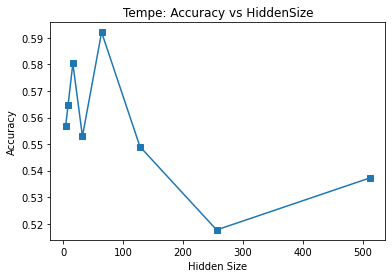

In [0]:
plotgraph(accuracy_list4,'Tempe: Accuracy vs HiddenSize')

In [0]:
accuracy_list5 = []
for hs in hidden_sizes:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  all_trainable_dicts['maricopa'][hs].train()
  print('\n-----Training Complete-----\n')
  accuracy_list5.append(all_trainable_dicts['maricopa'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.30865
Epoch: 1, loss: 0.28823
Epoch: 2, loss: 0.29241
Epoch: 3, loss: 0.27931
Epoch: 4, loss: 0.28541
Epoch: 5, loss: 0.29552
Epoch: 6, loss: 0.28916
Epoch: 7, loss: 0.28155
Epoch: 8, loss: 0.26806
Epoch: 9, loss: 0.28613

-----Training Complete-----

[[136  12]
 [120  26]]
accuracy:  0.5510204081632653
Report
               precision    recall  f1-score   support

         0.0       0.53      0.92      0.67       148
         1.0       0.68      0.18      0.28       146

    accuracy                           0.55       294
   macro avg       0.61      0.55      0.48       294
weighted avg       0.61      0.55      0.48       294


-----Start Training-----
-----Hidden Size: 8 -----



Epoch: 0, loss: 0.33195
Epoch: 1, loss: 0.28169
Epoch: 2, loss: 0.30434
Epoch: 3, loss: 0.29413
Epoch: 4, loss: 0.28805
Epoch: 5, loss: 0.28621
Epoch: 6, loss: 0.27523
Epoch: 7, loss: 0.29390
Epoch: 8, loss: 0.28697
Epoch: 9, loss: 0.28683

-----Training Complete-----

[[141   7]
 [137   9]]
accuracy:  0.5102040816326531
Report
               precision    recall  f1-score   support

         0.0       0.51      0.95      0.66       148
         1.0       0.56      0.06      0.11       146

    accuracy                           0.51       294
   macro avg       0.53      0.51      0.39       294
weighted avg       0.53      0.51      0.39       294


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.30353
Epoch: 1, loss: 0.29429
Epoch: 2, loss: 0.27239
Epoch: 3, loss: 0.28325
Epoch: 4, loss: 0.29548
Epoch: 5, loss: 0.28207
Epoch: 6, loss: 0.28869
Epoch: 7, loss: 0.29531
Epoch: 8, loss: 0.27527
Epoch: 9, loss: 0.28539

-----Training Complete-----

[[134  14]
 [124  22]]
accuracy:  0.5306122448979592
Report
               precision    recall  f1-score   support

         0.0       0.52      0.91      0.66       148
         1.0       0.61      0.15      0.24       146

    accuracy                           0.53       294
   macro avg       0.57      0.53      0.45       294
weighted avg       0.56      0.53      0.45       294


-----Start Training-----
-----Hidden Size: 32 -----



Epoch: 0, loss: 0.30520
Epoch: 1, loss: 0.28976
Epoch: 2, loss: 0.29719
Epoch: 3, loss: 0.29643
Epoch: 4, loss: 0.28521
Epoch: 5, loss: 0.27531
Epoch: 6, loss: 0.28828
Epoch: 7, loss: 0.29869
Epoch: 8, loss: 0.28991
Epoch: 9, loss: 0.29090

-----Training Complete-----

[[145   3]
 [141   5]]
accuracy:  0.5102040816326531
Report
               precision    recall  f1-score   support

         0.0       0.51      0.98      0.67       148
         1.0       0.62      0.03      0.06       146

    accuracy                           0.51       294
   macro avg       0.57      0.51      0.37       294
weighted avg       0.57      0.51      0.37       294


-----Start Training-----
-----Hidden Size: 64 -----



Epoch: 0, loss: 0.29433
Epoch: 1, loss: 0.29226
Epoch: 2, loss: 0.28500
Epoch: 3, loss: 0.28493
Epoch: 4, loss: 0.29857
Epoch: 5, loss: 0.28355
Epoch: 6, loss: 0.28609
Epoch: 7, loss: 0.28932
Epoch: 8, loss: 0.29790
Epoch: 9, loss: 0.28856

-----Training Complete-----

[[140   8]
 [133  13]]
accuracy:  0.5204081632653061
Report
               precision    recall  f1-score   support

         0.0       0.51      0.95      0.67       148
         1.0       0.62      0.09      0.16       146

    accuracy                           0.52       294
   macro avg       0.57      0.52      0.41       294
weighted avg       0.57      0.52      0.41       294


-----Start Training-----
-----Hidden Size: 128 -----



Epoch: 0, loss: 0.30605
Epoch: 1, loss: 0.30238
Epoch: 2, loss: 0.29166
Epoch: 3, loss: 0.29325
Epoch: 4, loss: 0.29083
Epoch: 5, loss: 0.27672
Epoch: 6, loss: 0.29467
Epoch: 7, loss: 0.28309
Epoch: 8, loss: 0.29542
Epoch: 9, loss: 0.28535

-----Training Complete-----

[[140   8]
 [135  11]]
accuracy:  0.5136054421768708
Report
               precision    recall  f1-score   support

         0.0       0.51      0.95      0.66       148
         1.0       0.58      0.08      0.13       146

    accuracy                           0.51       294
   macro avg       0.54      0.51      0.40       294
weighted avg       0.54      0.51      0.40       294


-----Start Training-----
-----Hidden Size: 256 -----



Epoch: 0, loss: 0.30918
Epoch: 1, loss: 0.29034
Epoch: 2, loss: 0.28965
Epoch: 3, loss: 0.30109
Epoch: 4, loss: 0.28713
Epoch: 5, loss: 0.29320
Epoch: 6, loss: 0.28227
Epoch: 7, loss: 0.28114
Epoch: 8, loss: 0.28210
Epoch: 9, loss: 0.28848

-----Training Complete-----

[[148   0]
 [146   0]]
accuracy:  0.5034013605442177
Report
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       148
         1.0       0.00      0.00      0.00       146

    accuracy                           0.50       294
   macro avg       0.25      0.50      0.33       294
weighted avg       0.25      0.50      0.34       294


-----Start Training-----
-----Hidden Size: 512 -----



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0, loss: 0.31116
Epoch: 1, loss: 0.30134
Epoch: 2, loss: 0.29209
Epoch: 3, loss: 0.30049
Epoch: 4, loss: 0.27912
Epoch: 5, loss: 0.29000
Epoch: 6, loss: 0.28625
Epoch: 7, loss: 0.29953
Epoch: 8, loss: 0.28887
Epoch: 9, loss: 0.27967

-----Training Complete-----

[[148   0]
 [146   0]]
accuracy:  0.5034013605442177
Report
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       148
         1.0       0.00      0.00      0.00       146

    accuracy                           0.50       294
   macro avg       0.25      0.50      0.33       294
weighted avg       0.25      0.50      0.34       294



In [0]:
accuracy_list5=[
  0.5510204081632653,
  0.5102040816326531,
  0.5306122448979592,
  0.5102040816326531,
  0.5204081632653061,
  0.5136054421768708,
  0.5034013605442177,
  0.5034013605442177              
]

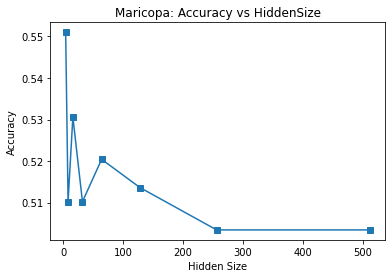

In [0]:
plotgraph(accuracy_list5,'Maricopa: Accuracy vs HiddenSize')

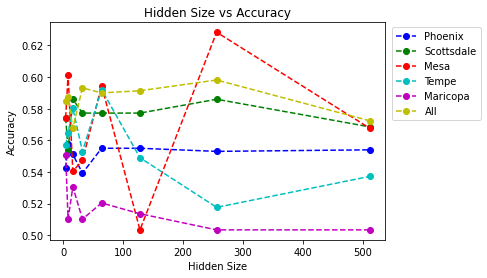

In [0]:

x = np.array(hidden_sizes)
y_1 = np.array(accuracy_list)
y_2 = np.array(accuracy_list2)
y_3 = np.array(accuracy_list3)
y_4 = np.array(accuracy_list4)
y_5 = np.array(accuracy_list5)
y_6 = np.array(all_acc_list)
plt.title('Hidden Size vs Accuracy')
plt.xlabel('Hidden Size')
plt.ylabel('Accuracy')
# 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
plt.plot(x,y_1,'o--',color='b',label='Phoenix')
plt.plot(x,y_2,'o--',color='g',label='Scottsdale')
plt.plot(x,y_3,'o--',color='r',label='Mesa')
plt.plot(x,y_4,'o--',color='c',label='Tempe')
plt.plot(x,y_5,'o--',color='m',label='Maricopa')
plt.plot(x,y_6,'o--',color='y',label='All')
plt.legend(bbox_to_anchor=(1.3, 1))

# Variable Layer Size

In [0]:
ls =[
     1,
     2,
     3,
     4
]

In [0]:
all_trainable_dicts2 = {}
for city in cities:
  dict_ls = {}
  for l in ls:
    dict_ls[l] = sf.Trainable(all_data_dicts[city],device,n_layers=l)
  all_trainable_dicts2[city] = dict_ls

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [0]:
accuracy_list_2 = []
for l in ls:
  print("\n-----Start Training-----")
  print("-----Layer Num:",l,'-----\n') 
  all_trainable_dicts2['phoenix'][l].train()
  print('\n-----Training Complete-----\n')
  accuracy_list_2.append(all_trainable_dicts2['phoenix'][l].test_printout())




-----Start Training-----
-----Layer Num: 1 -----



Epoch: 0, loss: 0.29315
Epoch: 1, loss: 0.28874
Epoch: 2, loss: 0.29051
Epoch: 3, loss: 0.28349
Epoch: 4, loss: 0.28488
Epoch: 5, loss: 0.29116
Epoch: 6, loss: 0.28825
Epoch: 7, loss: 0.28174
Epoch: 8, loss: 0.28520
Epoch: 9, loss: 0.28744

-----Training Complete-----

[[433  64]
 [385 136]]
accuracy:  0.5589390962671905
Report
               precision    recall  f1-score   support

         0.0       0.53      0.87      0.66       497
         1.0       0.68      0.26      0.38       521

    accuracy                           0.56      1018
   macro avg       0.60      0.57      0.52      1018
weighted avg       0.61      0.56      0.51      1018


-----Start Training-----
-----Layer Num: 2 -----



Epoch: 0, loss: 0.30588
Epoch: 1, loss: 0.29518
Epoch: 2, loss: 0.29245
Epoch: 3, loss: 0.29121
Epoch: 4, loss: 0.29344
Epoch: 5, loss: 0.29210
Epoch: 6, loss: 0.30062
Epoch: 7, loss: 0.28785
Epoch: 8, loss: 0.28923
Epoch: 9, loss: 0.28795

-----Training Complete-----

[[459  38]
 [446  75]]
accuracy:  0.5245579567779961
Report
               precision    recall  f1-score   support

         0.0       0.51      0.92      0.65       497
         1.0       0.66      0.14      0.24       521

    accuracy                           0.52      1018
   macro avg       0.59      0.53      0.45      1018
weighted avg       0.59      0.52      0.44      1018


-----Start Training-----
-----Layer Num: 3 -----



Epoch: 0, loss: 0.30449
Epoch: 1, loss: 0.28735
Epoch: 2, loss: 0.29472
Epoch: 3, loss: 0.28866
Epoch: 4, loss: 0.28755
Epoch: 5, loss: 0.28994
Epoch: 6, loss: 0.28972
Epoch: 7, loss: 0.28868
Epoch: 8, loss: 0.29138
Epoch: 9, loss: 0.29315

-----Training Complete-----

[[451  46]
 [421 100]]
accuracy:  0.5412573673870335
Report
               precision    recall  f1-score   support

         0.0       0.52      0.91      0.66       497
         1.0       0.68      0.19      0.30       521

    accuracy                           0.54      1018
   macro avg       0.60      0.55      0.48      1018
weighted avg       0.60      0.54      0.48      1018


-----Start Training-----
-----Layer Num: 4 -----



Epoch: 0, loss: 0.29398
Epoch: 1, loss: 0.29320
Epoch: 2, loss: 0.29059
Epoch: 3, loss: 0.29434
Epoch: 4, loss: 0.29290
Epoch: 5, loss: 0.29306
Epoch: 6, loss: 0.30041
Epoch: 7, loss: 0.29296
Epoch: 8, loss: 0.28589
Epoch: 9, loss: 0.28879

-----Training Complete-----

[[453  44]
 [418 103]]
accuracy:  0.5461689587426326
Report
               precision    recall  f1-score   support

         0.0       0.52      0.91      0.66       497
         1.0       0.70      0.20      0.31       521

    accuracy                           0.55      1018
   macro avg       0.61      0.55      0.49      1018
weighted avg       0.61      0.55      0.48      1018



In [0]:
accuracy_list_2_2 = []
for l in ls:
  print("\n-----Start Training-----")
  print("-----Layer Num:",l,'-----\n') 
  all_trainable_dicts2['scot'][l].train()
  print('\n-----Training Complete-----\n')
  accuracy_list_2_2.append(all_trainable_dicts2['scot'][l].test_printout())




-----Start Training-----
-----Layer Num: 1 -----



Epoch: 0, loss: 0.31194
Epoch: 1, loss: 0.28896
Epoch: 2, loss: 0.28857
Epoch: 3, loss: 0.28212
Epoch: 4, loss: 0.28887
Epoch: 5, loss: 0.29410
Epoch: 6, loss: 0.28967
Epoch: 7, loss: 0.27180
Epoch: 8, loss: 0.28731
Epoch: 9, loss: 0.28979

-----Training Complete-----

[[136  24]
 [133  50]]
accuracy:  0.5422740524781341
Report
               precision    recall  f1-score   support

         0.0       0.51      0.85      0.63       160
         1.0       0.68      0.27      0.39       183

    accuracy                           0.54       343
   macro avg       0.59      0.56      0.51       343
weighted avg       0.60      0.54      0.50       343


-----Start Training-----
-----Layer Num: 2 -----



Epoch: 0, loss: 0.31390
Epoch: 1, loss: 0.29816
Epoch: 2, loss: 0.29281
Epoch: 3, loss: 0.29498
Epoch: 4, loss: 0.28965
Epoch: 5, loss: 0.28048
Epoch: 6, loss: 0.28363
Epoch: 7, loss: 0.28046
Epoch: 8, loss: 0.28293
Epoch: 9, loss: 0.29386

-----Training Complete-----

[[142  18]
 [142  41]]
accuracy:  0.5335276967930029
Report
               precision    recall  f1-score   support

         0.0       0.50      0.89      0.64       160
         1.0       0.69      0.22      0.34       183

    accuracy                           0.53       343
   macro avg       0.60      0.56      0.49       343
weighted avg       0.60      0.53      0.48       343


-----Start Training-----
-----Layer Num: 3 -----



Epoch: 0, loss: 0.30098
Epoch: 1, loss: 0.29862
Epoch: 2, loss: 0.28498
Epoch: 3, loss: 0.29758
Epoch: 4, loss: 0.29282
Epoch: 5, loss: 0.28631
Epoch: 6, loss: 0.29391
Epoch: 7, loss: 0.28861
Epoch: 8, loss: 0.28893
Epoch: 9, loss: 0.29340

-----Training Complete-----

[[146  14]
 [146  37]]
accuracy:  0.5335276967930029
Report
               precision    recall  f1-score   support

         0.0       0.50      0.91      0.65       160
         1.0       0.73      0.20      0.32       183

    accuracy                           0.53       343
   macro avg       0.61      0.56      0.48       343
weighted avg       0.62      0.53      0.47       343


-----Start Training-----
-----Layer Num: 4 -----



Epoch: 0, loss: 0.31635
Epoch: 1, loss: 0.29797
Epoch: 2, loss: 0.28617
Epoch: 3, loss: 0.28981
Epoch: 4, loss: 0.29361
Epoch: 5, loss: 0.29888
Epoch: 6, loss: 0.28501
Epoch: 7, loss: 0.28735
Epoch: 8, loss: 0.28568
Epoch: 9, loss: 0.28101

-----Training Complete-----

[[116  44]
 [117  66]]
accuracy:  0.5306122448979592
Report
               precision    recall  f1-score   support

         0.0       0.50      0.72      0.59       160
         1.0       0.60      0.36      0.45       183

    accuracy                           0.53       343
   macro avg       0.55      0.54      0.52       343
weighted avg       0.55      0.53      0.52       343



In [0]:
accuracy_list_3_2 = []
for l in ls:
  print("\n-----Start Training-----")
  print("-----Layer Num:",l,'-----\n') 
  all_trainable_dicts2['mesa'][l].train()
  print('\n-----Training Complete-----\n')
  accuracy_list_3_2.append(all_trainable_dicts2['mesa'][l].test_printout())




-----Start Training-----
-----Layer Num: 1 -----



Epoch: 0, loss: 0.30726
Epoch: 1, loss: 0.30088
Epoch: 2, loss: 0.28780
Epoch: 3, loss: 0.29042
Epoch: 4, loss: 0.28552
Epoch: 5, loss: 0.27463
Epoch: 6, loss: 0.28994
Epoch: 7, loss: 0.28764
Epoch: 8, loss: 0.28456
Epoch: 9, loss: 0.28794

-----Training Complete-----

[[125  31]
 [ 93  47]]
accuracy:  0.581081081081081
Report
               precision    recall  f1-score   support

         0.0       0.57      0.80      0.67       156
         1.0       0.60      0.34      0.43       140

    accuracy                           0.58       296
   macro avg       0.59      0.57      0.55       296
weighted avg       0.59      0.58      0.56       296


-----Start Training-----
-----Layer Num: 2 -----



Epoch: 0, loss: 0.31271
Epoch: 1, loss: 0.29697
Epoch: 2, loss: 0.30171
Epoch: 3, loss: 0.29473
Epoch: 4, loss: 0.28754
Epoch: 5, loss: 0.28055
Epoch: 6, loss: 0.29277
Epoch: 7, loss: 0.28044
Epoch: 8, loss: 0.28356
Epoch: 9, loss: 0.27395

-----Training Complete-----

[[118  38]
 [ 92  48]]
accuracy:  0.5608108108108109
Report
               precision    recall  f1-score   support

         0.0       0.56      0.76      0.64       156
         1.0       0.56      0.34      0.42       140

    accuracy                           0.56       296
   macro avg       0.56      0.55      0.53       296
weighted avg       0.56      0.56      0.54       296


-----Start Training-----
-----Layer Num: 3 -----



Epoch: 0, loss: 0.29426
Epoch: 1, loss: 0.29585
Epoch: 2, loss: 0.29359
Epoch: 3, loss: 0.28150
Epoch: 4, loss: 0.29649
Epoch: 5, loss: 0.29256
Epoch: 6, loss: 0.28817
Epoch: 7, loss: 0.28387
Epoch: 8, loss: 0.28138
Epoch: 9, loss: 0.29091

-----Training Complete-----

[[137  19]
 [112  28]]
accuracy:  0.5574324324324325
Report
               precision    recall  f1-score   support

         0.0       0.55      0.88      0.68       156
         1.0       0.60      0.20      0.30       140

    accuracy                           0.56       296
   macro avg       0.57      0.54      0.49       296
weighted avg       0.57      0.56      0.50       296


-----Start Training-----
-----Layer Num: 4 -----



Epoch: 0, loss: 0.31325
Epoch: 1, loss: 0.30870
Epoch: 2, loss: 0.29428
Epoch: 3, loss: 0.29971
Epoch: 4, loss: 0.28768
Epoch: 5, loss: 0.29401
Epoch: 6, loss: 0.28685
Epoch: 7, loss: 0.30655
Epoch: 8, loss: 0.29035
Epoch: 9, loss: 0.29433

-----Training Complete-----

[[99 57]
 [61 79]]
accuracy:  0.6013513513513513
Report
               precision    recall  f1-score   support

         0.0       0.62      0.63      0.63       156
         1.0       0.58      0.56      0.57       140

    accuracy                           0.60       296
   macro avg       0.60      0.60      0.60       296
weighted avg       0.60      0.60      0.60       296



In [0]:
accuracy_list_4_2 = []
for l in ls:
  print("\n-----Start Training-----")
  print("-----Layer Num:",l,'-----\n') 
  all_trainable_dicts2['tempe'][l].train()
  print('\n-----Training Complete-----\n')
  accuracy_list_4_2.append(all_trainable_dicts2['tempe'][l].test_printout())




-----Start Training-----
-----Layer Num: 1 -----



Epoch: 0, loss: 0.29264
Epoch: 1, loss: 0.28741
Epoch: 2, loss: 0.28575
Epoch: 3, loss: 0.27798
Epoch: 4, loss: 0.29425
Epoch: 5, loss: 0.27720
Epoch: 6, loss: 0.28089
Epoch: 7, loss: 0.28674
Epoch: 8, loss: 0.28265
Epoch: 9, loss: 0.27241

-----Training Complete-----

[[106  16]
 [ 96  37]]
accuracy:  0.5607843137254902
Report
               precision    recall  f1-score   support

         0.0       0.52      0.87      0.65       122
         1.0       0.70      0.28      0.40       133

    accuracy                           0.56       255
   macro avg       0.61      0.57      0.53       255
weighted avg       0.62      0.56      0.52       255


-----Start Training-----
-----Layer Num: 2 -----



Epoch: 0, loss: 0.29381
Epoch: 1, loss: 0.29391
Epoch: 2, loss: 0.27782
Epoch: 3, loss: 0.28449
Epoch: 4, loss: 0.28980
Epoch: 5, loss: 0.29383
Epoch: 6, loss: 0.28416
Epoch: 7, loss: 0.27897
Epoch: 8, loss: 0.29060
Epoch: 9, loss: 0.28866

-----Training Complete-----

[[117   5]
 [126   7]]
accuracy:  0.48627450980392156
Report
               precision    recall  f1-score   support

         0.0       0.48      0.96      0.64       122
         1.0       0.58      0.05      0.10       133

    accuracy                           0.49       255
   macro avg       0.53      0.51      0.37       255
weighted avg       0.53      0.49      0.36       255


-----Start Training-----
-----Layer Num: 3 -----



Epoch: 0, loss: 0.31427
Epoch: 1, loss: 0.29082
Epoch: 2, loss: 0.29455
Epoch: 3, loss: 0.28887
Epoch: 4, loss: 0.28006
Epoch: 5, loss: 0.29123
Epoch: 6, loss: 0.28478
Epoch: 7, loss: 0.28520
Epoch: 8, loss: 0.27283
Epoch: 9, loss: 0.28232

-----Training Complete-----

[[107  15]
 [ 95  38]]
accuracy:  0.5686274509803921
Report
               precision    recall  f1-score   support

         0.0       0.53      0.88      0.66       122
         1.0       0.72      0.29      0.41       133

    accuracy                           0.57       255
   macro avg       0.62      0.58      0.53       255
weighted avg       0.63      0.57      0.53       255


-----Start Training-----
-----Layer Num: 4 -----



Epoch: 0, loss: 0.31352
Epoch: 1, loss: 0.30508
Epoch: 2, loss: 0.29569
Epoch: 3, loss: 0.29478
Epoch: 4, loss: 0.29287
Epoch: 5, loss: 0.28707
Epoch: 6, loss: 0.28501
Epoch: 7, loss: 0.28806
Epoch: 8, loss: 0.28608
Epoch: 9, loss: 0.27227

-----Training Complete-----

[[100  22]
 [ 92  41]]
accuracy:  0.5529411764705883
Report
               precision    recall  f1-score   support

         0.0       0.52      0.82      0.64       122
         1.0       0.65      0.31      0.42       133

    accuracy                           0.55       255
   macro avg       0.59      0.56      0.53       255
weighted avg       0.59      0.55      0.52       255



In [0]:
accuracy_list_5_2 = []
for l in ls:
  print("\n-----Start Training-----")
  print("-----Layer Num:",l,'-----\n') 
  all_trainable_dicts2['maricopa'][l].train()
  print('\n-----Training Complete-----\n')
  accuracy_list_5_2.append(all_trainable_dicts2['maricopa'][l].test_printout())




-----Start Training-----
-----Layer Num: 1 -----



Epoch: 0, loss: 0.29509
Epoch: 1, loss: 0.26697
Epoch: 2, loss: 0.28925
Epoch: 3, loss: 0.28832
Epoch: 4, loss: 0.28949
Epoch: 5, loss: 0.28736
Epoch: 6, loss: 0.28124
Epoch: 7, loss: 0.28238
Epoch: 8, loss: 0.27758
Epoch: 9, loss: 0.28774

-----Training Complete-----

[[129  16]
 [104  45]]
accuracy:  0.5918367346938775
Report
               precision    recall  f1-score   support

         0.0       0.55      0.89      0.68       145
         1.0       0.74      0.30      0.43       149

    accuracy                           0.59       294
   macro avg       0.65      0.60      0.56       294
weighted avg       0.65      0.59      0.55       294


-----Start Training-----
-----Layer Num: 2 -----



Epoch: 0, loss: 0.29744
Epoch: 1, loss: 0.28494
Epoch: 2, loss: 0.28727
Epoch: 3, loss: 0.29227
Epoch: 4, loss: 0.30158
Epoch: 5, loss: 0.29172
Epoch: 6, loss: 0.27523
Epoch: 7, loss: 0.29000
Epoch: 8, loss: 0.28399
Epoch: 9, loss: 0.28618

-----Training Complete-----

[[130  15]
 [106  43]]
accuracy:  0.5884353741496599
Report
               precision    recall  f1-score   support

         0.0       0.55      0.90      0.68       145
         1.0       0.74      0.29      0.42       149

    accuracy                           0.59       294
   macro avg       0.65      0.59      0.55       294
weighted avg       0.65      0.59      0.55       294


-----Start Training-----
-----Layer Num: 3 -----



Epoch: 0, loss: 0.32345
Epoch: 1, loss: 0.28767
Epoch: 2, loss: 0.28180
Epoch: 3, loss: 0.29520
Epoch: 4, loss: 0.29905
Epoch: 5, loss: 0.29697
Epoch: 6, loss: 0.27374
Epoch: 7, loss: 0.28795
Epoch: 8, loss: 0.27475
Epoch: 9, loss: 0.27803

-----Training Complete-----

[[142   3]
 [147   2]]
accuracy:  0.4897959183673469
Report
               precision    recall  f1-score   support

         0.0       0.49      0.98      0.65       145
         1.0       0.40      0.01      0.03       149

    accuracy                           0.49       294
   macro avg       0.45      0.50      0.34       294
weighted avg       0.45      0.49      0.34       294


-----Start Training-----
-----Layer Num: 4 -----



Epoch: 0, loss: 0.32270
Epoch: 1, loss: 0.29678
Epoch: 2, loss: 0.29856
Epoch: 3, loss: 0.28561
Epoch: 4, loss: 0.29065
Epoch: 5, loss: 0.28750
Epoch: 6, loss: 0.28511
Epoch: 7, loss: 0.28846
Epoch: 8, loss: 0.30010
Epoch: 9, loss: 0.28604

-----Training Complete-----

[[145   0]
 [149   0]]
accuracy:  0.4931972789115646
Report
               precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       145
         1.0       0.00      0.00      0.00       149

    accuracy                           0.49       294
   macro avg       0.25      0.50      0.33       294
weighted avg       0.24      0.49      0.33       294



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


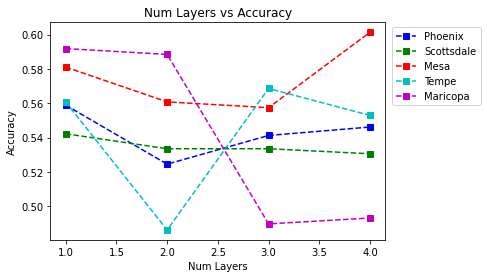

In [0]:

x = np.array(ls)
y_1 = np.array(accuracy_list_2)
y_2 = np.array(accuracy_list_2_2)
y_3 = np.array(accuracy_list_3_2)
y_4 = np.array(accuracy_list_4_2)
y_5 = np.array(accuracy_list_5_2)

plt.title('Num Layers vs Accuracy')
plt.xlabel('Num Layers')
plt.ylabel('Accuracy')
# 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
plt.plot(x,y_1,'s--',color='b',label='Phoenix')
plt.plot(x,y_2,'s--',color='g',label='Scottsdale')
plt.plot(x,y_3,'s--',color='r',label='Mesa')
plt.plot(x,y_4,'s--',color='c',label='Tempe')
plt.plot(x,y_5,'s--',color='m',label='Maricopa')
plt.legend(bbox_to_anchor=(1.3, 1))

## No Race Citiess

In [0]:
hidden_sizes2=[
    4,
    16
]

In [0]:
norace_dataLoader = {}
for city in cities:
  norace_dataLoader[city] = sf.CustomDataLoader(all_dfs[city].drop(['race_1','race_2','race_3','race_4','race_5'],axis=1))
  
norace_data_dicts = {}
for city in cities:
  x,y =norace_dataLoader[city].resampledData()
  norace_data_dicts[city] = sf.generate_dict(x,y,device)

norace_trainable_dicts = {}
for city in cities:
  dict_hs = {}
  for hs in hidden_sizes2:
    dict_hs[hs] = sf.Trainable(norace_data_dicts[city],device,hs=hs,n_features=4)
  norace_trainable_dicts[city] = dict_hs

2545 1165
857 336
738 318
636 260
735 392
Input_Size: 4
Input_Size: 4
Input_Size: 4
Input_Size: 4
Input_Size: 4
Input_Size: 4
Input_Size: 4
Input_Size: 4
Input_Size: 4
Input_Size: 4


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [0]:
no_race_acc_hs = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  norace_trainable_dicts['phoenix'][hs].train()
  print('\n-----Training Complete-----\n')
  no_race_acc_hs.append(norace_trainable_dicts['phoenix'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.32686
Epoch: 1, loss: 0.28690
Epoch: 2, loss: 0.29140
Epoch: 3, loss: 0.28658
Epoch: 4, loss: 0.28869
Epoch: 5, loss: 0.28982
Epoch: 6, loss: 0.29073
Epoch: 7, loss: 0.28817
Epoch: 8, loss: 0.28546
Epoch: 9, loss: 0.28635

-----Training Complete-----

[[376 114]
 [312 216]]
accuracy:  0.581532416502947
Report
               precision    recall  f1-score   support

         0.0       0.55      0.77      0.64       490
         1.0       0.65      0.41      0.50       528

    accuracy                           0.58      1018
   macro avg       0.60      0.59      0.57      1018
weighted avg       0.60      0.58      0.57      1018


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.29887
Epoch: 1, loss: 0.28955
Epoch: 2, loss: 0.29156
Epoch: 3, loss: 0.28805
Epoch: 4, loss: 0.29366
Epoch: 5, loss: 0.29186
Epoch: 6, loss: 0.29075
Epoch: 7, loss: 0.29073
Epoch: 8, loss: 0.28389
Epoch: 9, loss: 0.28356

-----Training Complete-----

[[373 117]
 [296 232]]
accuracy:  0.5943025540275049
Report
               precision    recall  f1-score   support

         0.0       0.56      0.76      0.64       490
         1.0       0.66      0.44      0.53       528

    accuracy                           0.59      1018
   macro avg       0.61      0.60      0.59      1018
weighted avg       0.61      0.59      0.58      1018



In [0]:
no_race_acc_hs2 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  norace_trainable_dicts['scot'][hs].train()
  print('\n-----Training Complete-----\n')
  no_race_acc_hs2.append(norace_trainable_dicts['scot'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.31507
Epoch: 1, loss: 0.29610
Epoch: 2, loss: 0.29363
Epoch: 3, loss: 0.29289
Epoch: 4, loss: 0.28969
Epoch: 5, loss: 0.28999
Epoch: 6, loss: 0.29582
Epoch: 7, loss: 0.30465
Epoch: 8, loss: 0.28407
Epoch: 9, loss: 0.29403

-----Training Complete-----

[[160  14]
 [123  46]]
accuracy:  0.6005830903790087
Report
               precision    recall  f1-score   support

         0.0       0.57      0.92      0.70       174
         1.0       0.77      0.27      0.40       169

    accuracy                           0.60       343
   macro avg       0.67      0.60      0.55       343
weighted avg       0.66      0.60      0.55       343


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.28921
Epoch: 1, loss: 0.30008
Epoch: 2, loss: 0.28683
Epoch: 3, loss: 0.29117
Epoch: 4, loss: 0.29940
Epoch: 5, loss: 0.28559
Epoch: 6, loss: 0.28998
Epoch: 7, loss: 0.28965
Epoch: 8, loss: 0.29677
Epoch: 9, loss: 0.29090

-----Training Complete-----

[[154  20]
 [109  60]]
accuracy:  0.6239067055393586
Report
               precision    recall  f1-score   support

         0.0       0.59      0.89      0.70       174
         1.0       0.75      0.36      0.48       169

    accuracy                           0.62       343
   macro avg       0.67      0.62      0.59       343
weighted avg       0.67      0.62      0.59       343



In [0]:
no_race_acc_hs3 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  norace_trainable_dicts['mesa'][hs].train()
  print('\n-----Training Complete-----\n')
  no_race_acc_hs3.append(norace_trainable_dicts['mesa'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.35970
Epoch: 1, loss: 0.27416
Epoch: 2, loss: 0.29944
Epoch: 3, loss: 0.28880
Epoch: 4, loss: 0.29618
Epoch: 5, loss: 0.28784
Epoch: 6, loss: 0.28589
Epoch: 7, loss: 0.27360
Epoch: 8, loss: 0.28811
Epoch: 9, loss: 0.28610

-----Training Complete-----

[[103  45]
 [ 89  59]]
accuracy:  0.5472972972972973
Report
               precision    recall  f1-score   support

         0.0       0.54      0.70      0.61       148
         1.0       0.57      0.40      0.47       148

    accuracy                           0.55       296
   macro avg       0.55      0.55      0.54       296
weighted avg       0.55      0.55      0.54       296


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.29527
Epoch: 1, loss: 0.28195
Epoch: 2, loss: 0.28627
Epoch: 3, loss: 0.28658
Epoch: 4, loss: 0.28757
Epoch: 5, loss: 0.26941
Epoch: 6, loss: 0.28933
Epoch: 7, loss: 0.28148
Epoch: 8, loss: 0.28390
Epoch: 9, loss: 0.28634

-----Training Complete-----

[[135  13]
 [139   9]]
accuracy:  0.4864864864864865
Report
               precision    recall  f1-score   support

         0.0       0.49      0.91      0.64       148
         1.0       0.41      0.06      0.11       148

    accuracy                           0.49       296
   macro avg       0.45      0.49      0.37       296
weighted avg       0.45      0.49      0.37       296



In [0]:
no_race_acc_hs4 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  norace_trainable_dicts['tempe'][hs].train()
  print('\n-----Training Complete-----\n')
  no_race_acc_hs4.append(norace_trainable_dicts['tempe'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.40739
Epoch: 1, loss: 0.28691
Epoch: 2, loss: 0.28854
Epoch: 3, loss: 0.28476
Epoch: 4, loss: 0.28213
Epoch: 5, loss: 0.27684
Epoch: 6, loss: 0.29058
Epoch: 7, loss: 0.29016
Epoch: 8, loss: 0.27870
Epoch: 9, loss: 0.27829

-----Training Complete-----

[[109  11]
 [104  31]]
accuracy:  0.5490196078431373
Report
               precision    recall  f1-score   support

         0.0       0.51      0.91      0.65       120
         1.0       0.74      0.23      0.35       135

    accuracy                           0.55       255
   macro avg       0.62      0.57      0.50       255
weighted avg       0.63      0.55      0.49       255


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.30406
Epoch: 1, loss: 0.29035
Epoch: 2, loss: 0.28044
Epoch: 3, loss: 0.28543
Epoch: 4, loss: 0.28253
Epoch: 5, loss: 0.28439
Epoch: 6, loss: 0.28361
Epoch: 7, loss: 0.27079
Epoch: 8, loss: 0.29082
Epoch: 9, loss: 0.27465

-----Training Complete-----

[[103  17]
 [ 92  43]]
accuracy:  0.5725490196078431
Report
               precision    recall  f1-score   support

         0.0       0.53      0.86      0.65       120
         1.0       0.72      0.32      0.44       135

    accuracy                           0.57       255
   macro avg       0.62      0.59      0.55       255
weighted avg       0.63      0.57      0.54       255



In [0]:
no_race_acc_hs5 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  norace_trainable_dicts['maricopa'][hs].train()
  print('\n-----Training Complete-----\n')
  no_race_acc_hs5.append(norace_trainable_dicts['maricopa'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.39741
Epoch: 1, loss: 0.29035
Epoch: 2, loss: 0.28800
Epoch: 3, loss: 0.28771
Epoch: 4, loss: 0.27166
Epoch: 5, loss: 0.28637
Epoch: 6, loss: 0.28030
Epoch: 7, loss: 0.28141
Epoch: 8, loss: 0.28573
Epoch: 9, loss: 0.28822

-----Training Complete-----

[[118  36]
 [ 99  41]]
accuracy:  0.5408163265306123
Report
               precision    recall  f1-score   support

         0.0       0.54      0.77      0.64       154
         1.0       0.53      0.29      0.38       140

    accuracy                           0.54       294
   macro avg       0.54      0.53      0.51       294
weighted avg       0.54      0.54      0.51       294


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.29513
Epoch: 1, loss: 0.28178
Epoch: 2, loss: 0.29131
Epoch: 3, loss: 0.29084
Epoch: 4, loss: 0.29127
Epoch: 5, loss: 0.28627
Epoch: 6, loss: 0.28390
Epoch: 7, loss: 0.28113
Epoch: 8, loss: 0.27991
Epoch: 9, loss: 0.27123

-----Training Complete-----

[[110  44]
 [ 92  48]]
accuracy:  0.5374149659863946
Report
               precision    recall  f1-score   support

         0.0       0.54      0.71      0.62       154
         1.0       0.52      0.34      0.41       140

    accuracy                           0.54       294
   macro avg       0.53      0.53      0.52       294
weighted avg       0.53      0.54      0.52       294



In [0]:
accuracy_norace = [
    0.59,
    0.62, 
    0.49,
    0.57,  
    0.54 
]

f1_norace = [
     0.58,
     0.59,
     0.37,
     0.55,     
     0.52 
]

cities2 =[
    'Phoenix',
    'ScottsDale',
    'Mesa',
    'Tempe',
    'Maricopa County'
]

Text(0, 0.5, 'Accuracy/F1')

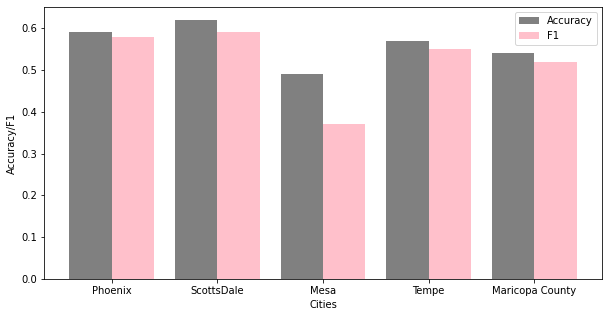

In [0]:
ind = np.arange(5)
width=0.4
# Figure size
plt.figure(figsize=(10,5))
plt.bar(ind,accuracy_norace,color='#808080',width=width,label='Accuracy')
plt.bar(ind+width,f1_norace,color='#FFC0CB',width=width,label='F1')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Cities')
# Figure size
plt.xticks(ind + width / 2, cities2)
plt.ylabel('Accuracy/F1')

In [0]:
noUserStars_dataLoader = {}
for city in cities:
  noUserStars_dataLoader[city] = sf.CustomDataLoader(all_dfs[city].drop(['user_stars'],axis=1))
  
noUserStars_data_dicts = {}
for city in cities:
  x,y =noUserStars_dataLoader[city].resampledData()
  noUserStars_data_dicts[city] = sf.generate_dict(x,y,device)

noUserStars_trainable_dicts = {}
for city in cities:
  dict_hs = {}
  for hs in hidden_sizes2:
    dict_hs[hs] = sf.Trainable(noUserStars_data_dicts[city],device,hs=hs,n_features=8)
  noUserStars_trainable_dicts[city] = dict_hs

2545 1165
857 336
738 318
636 260
735 392
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [0]:
no_user_stars_acc_hs = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  noUserStars_trainable_dicts['phoenix'][hs].train()
  print('\n-----Training Complete-----\n')
  no_user_stars_acc_hs.append(noUserStars_trainable_dicts['phoenix'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.33687
Epoch: 1, loss: 0.29487
Epoch: 2, loss: 0.28219
Epoch: 3, loss: 0.28795
Epoch: 4, loss: 0.28712
Epoch: 5, loss: 0.28635
Epoch: 6, loss: 0.28769
Epoch: 7, loss: 0.28771
Epoch: 8, loss: 0.28947
Epoch: 9, loss: 0.29084

-----Training Complete-----

[[467  48]
 [410  93]]
accuracy:  0.550098231827112
Report
               precision    recall  f1-score   support

         0.0       0.53      0.91      0.67       515
         1.0       0.66      0.18      0.29       503

    accuracy                           0.55      1018
   macro avg       0.60      0.55      0.48      1018
weighted avg       0.60      0.55      0.48      1018


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.29714
Epoch: 1, loss: 0.29353
Epoch: 2, loss: 0.29702
Epoch: 3, loss: 0.28452
Epoch: 4, loss: 0.29474
Epoch: 5, loss: 0.28345
Epoch: 6, loss: 0.28615
Epoch: 7, loss: 0.28290
Epoch: 8, loss: 0.28738
Epoch: 9, loss: 0.28482

-----Training Complete-----

[[454  61]
 [367 136]]
accuracy:  0.5795677799607073
Report
               precision    recall  f1-score   support

         0.0       0.55      0.88      0.68       515
         1.0       0.69      0.27      0.39       503

    accuracy                           0.58      1018
   macro avg       0.62      0.58      0.53      1018
weighted avg       0.62      0.58      0.54      1018



In [0]:
no_user_stars_acc_hs2 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  noUserStars_trainable_dicts['scot'][hs].train()
  print('\n-----Training Complete-----\n')
  no_user_stars_acc_hs2.append(noUserStars_trainable_dicts['scot'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.34555
Epoch: 1, loss: 0.30101
Epoch: 2, loss: 0.29487
Epoch: 3, loss: 0.27881
Epoch: 4, loss: 0.28676
Epoch: 5, loss: 0.27567
Epoch: 6, loss: 0.29054
Epoch: 7, loss: 0.28955
Epoch: 8, loss: 0.28970
Epoch: 9, loss: 0.29847

-----Training Complete-----

[[155  12]
 [150  26]]
accuracy:  0.5276967930029155
Report
               precision    recall  f1-score   support

         0.0       0.51      0.93      0.66       167
         1.0       0.68      0.15      0.24       176

    accuracy                           0.53       343
   macro avg       0.60      0.54      0.45       343
weighted avg       0.60      0.53      0.44       343


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.29533
Epoch: 1, loss: 0.28978
Epoch: 2, loss: 0.29099
Epoch: 3, loss: 0.27923
Epoch: 4, loss: 0.27818
Epoch: 5, loss: 0.28264
Epoch: 6, loss: 0.28205
Epoch: 7, loss: 0.28630
Epoch: 8, loss: 0.28224
Epoch: 9, loss: 0.28749

-----Training Complete-----

[[156  11]
 [153  23]]
accuracy:  0.521865889212828
Report
               precision    recall  f1-score   support

         0.0       0.50      0.93      0.66       167
         1.0       0.68      0.13      0.22       176

    accuracy                           0.52       343
   macro avg       0.59      0.53      0.44       343
weighted avg       0.59      0.52      0.43       343



In [0]:
no_user_stars_acc_hs3 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  noUserStars_trainable_dicts['mesa'][hs].train()
  print('\n-----Training Complete-----\n')
  no_user_stars_acc_hs3.append(noUserStars_trainable_dicts['mesa'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.32014
Epoch: 1, loss: 0.28544
Epoch: 2, loss: 0.30651
Epoch: 3, loss: 0.29905
Epoch: 4, loss: 0.28763
Epoch: 5, loss: 0.27174
Epoch: 6, loss: 0.28126
Epoch: 7, loss: 0.29621
Epoch: 8, loss: 0.27801
Epoch: 9, loss: 0.28033

-----Training Complete-----

[[130  26]
 [ 90  50]]
accuracy:  0.6081081081081081
Report
               precision    recall  f1-score   support

         0.0       0.59      0.83      0.69       156
         1.0       0.66      0.36      0.46       140

    accuracy                           0.61       296
   macro avg       0.62      0.60      0.58       296
weighted avg       0.62      0.61      0.58       296


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.30813
Epoch: 1, loss: 0.28648
Epoch: 2, loss: 0.27891
Epoch: 3, loss: 0.28818
Epoch: 4, loss: 0.27345
Epoch: 5, loss: 0.27096
Epoch: 6, loss: 0.27648
Epoch: 7, loss: 0.28261
Epoch: 8, loss: 0.27329
Epoch: 9, loss: 0.27734

-----Training Complete-----

[[129  27]
 [ 91  49]]
accuracy:  0.6013513513513513
Report
               precision    recall  f1-score   support

         0.0       0.59      0.83      0.69       156
         1.0       0.64      0.35      0.45       140

    accuracy                           0.60       296
   macro avg       0.62      0.59      0.57       296
weighted avg       0.61      0.60      0.58       296



In [0]:
no_user_stars_acc_hs4 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  noUserStars_trainable_dicts['tempe'][hs].train()
  print('\n-----Training Complete-----\n')
  no_user_stars_acc_hs4.append(noUserStars_trainable_dicts['tempe'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.32655
Epoch: 1, loss: 0.30855
Epoch: 2, loss: 0.28494
Epoch: 3, loss: 0.28914
Epoch: 4, loss: 0.29133
Epoch: 5, loss: 0.29446
Epoch: 6, loss: 0.28284
Epoch: 7, loss: 0.29164
Epoch: 8, loss: 0.28489
Epoch: 9, loss: 0.27446

-----Training Complete-----

[[117  24]
 [ 74  40]]
accuracy:  0.615686274509804
Report
               precision    recall  f1-score   support

         0.0       0.61      0.83      0.70       141
         1.0       0.62      0.35      0.45       114

    accuracy                           0.62       255
   macro avg       0.62      0.59      0.58       255
weighted avg       0.62      0.62      0.59       255


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.34280
Epoch: 1, loss: 0.30069
Epoch: 2, loss: 0.29502
Epoch: 3, loss: 0.28903
Epoch: 4, loss: 0.29572
Epoch: 5, loss: 0.29145
Epoch: 6, loss: 0.28280
Epoch: 7, loss: 0.29200
Epoch: 8, loss: 0.27841
Epoch: 9, loss: 0.28567

-----Training Complete-----

[[114  27]
 [ 67  47]]
accuracy:  0.6313725490196078
Report
               precision    recall  f1-score   support

         0.0       0.63      0.81      0.71       141
         1.0       0.64      0.41      0.50       114

    accuracy                           0.63       255
   macro avg       0.63      0.61      0.60       255
weighted avg       0.63      0.63      0.62       255



In [0]:
no_user_stars_acc_hs5 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  noUserStars_trainable_dicts['maricopa'][hs].train()
  print('\n-----Training Complete-----\n')
  no_user_stars_acc_hs5.append(noUserStars_trainable_dicts['maricopa'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.29673
Epoch: 1, loss: 0.29283
Epoch: 2, loss: 0.27967
Epoch: 3, loss: 0.28903
Epoch: 4, loss: 0.28612
Epoch: 5, loss: 0.28426
Epoch: 6, loss: 0.28223
Epoch: 7, loss: 0.27774
Epoch: 8, loss: 0.28052
Epoch: 9, loss: 0.27748

-----Training Complete-----

[[101  38]
 [ 89  66]]
accuracy:  0.5680272108843537
Report
               precision    recall  f1-score   support

         0.0       0.53      0.73      0.61       139
         1.0       0.63      0.43      0.51       155

    accuracy                           0.57       294
   macro avg       0.58      0.58      0.56       294
weighted avg       0.59      0.57      0.56       294


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.31533
Epoch: 1, loss: 0.28792
Epoch: 2, loss: 0.27795
Epoch: 3, loss: 0.27687
Epoch: 4, loss: 0.28235
Epoch: 5, loss: 0.28171
Epoch: 6, loss: 0.29296
Epoch: 7, loss: 0.28207
Epoch: 8, loss: 0.27745
Epoch: 9, loss: 0.28770

-----Training Complete-----

[[101  38]
 [ 93  62]]
accuracy:  0.5544217687074829
Report
               precision    recall  f1-score   support

         0.0       0.52      0.73      0.61       139
         1.0       0.62      0.40      0.49       155

    accuracy                           0.55       294
   macro avg       0.57      0.56      0.55       294
weighted avg       0.57      0.55      0.54       294



In [0]:
accuracy_no_ustars = [
    0.58,
    0.52, 
    0.60,
    0.63,  
    0.55 
]

f1_no_ustars = [
     0.54,
     0.44,
     0.57,
     0.62,     
     0.55 
]

cities2 =[
    'Phoenix',
    'ScottsDale',
    'Mesa',
    'Tempe',
    'Maricopa County'
]

Text(0, 0.5, 'Accuracy/F1')

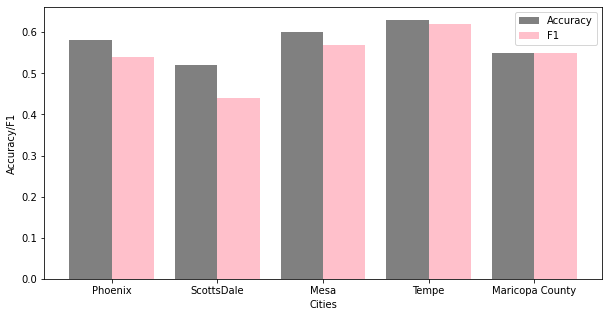

In [0]:
ind = np.arange(5)
width=0.4
# Figure size
plt.figure(figsize=(10,5))
plt.bar(ind,accuracy_no_ustars,color='#808080',width=width,label='Accuracy')
plt.bar(ind+width,f1_no_ustars,color='#FFC0CB',width=width,label='F1')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Cities')
# Figure size
plt.xticks(ind + width / 2, cities2)
plt.ylabel('Accuracy/F1')

In [0]:
all_dfs['phoenix']

,date,stars,user_stars,rate,reviews,race_1,race_2,race_3,race_4,race_5
0,2013 mid,3.0,3.518421,-5,0.750000,-5.69,0.16,-0.06,-0.24,0.10
1,2014,3.0,3.518421,-3,1.000000,-6.76,0.18,0.06,-0.16,0.06
2,2014 mid,3.0,3.518421,0,0.500000,-6.53,0.17,0.03,-0.33,0.01
3,2015,3.0,3.518421,-1,0.000000,-6.30,0.16,0.00,-0.50,-0.04
4,2015 mid,3.0,3.518421,0,0.000000,-6.30,0.16,0.00,-0.50,-0.04
...,...,...,...,...,...,...,...,...,...,...
18545,2013 mid,4.0,3.880000,5,0.916667,-5.69,0.16,-0.06,-0.24,0.10
18546,2014,4.0,3.880000,-9,1.000000,-6.76,0.18,0.06,-0.16,0.06
18547,2014 mid,4.0,3.880000,-1,1.000000,-6.53,0.17,0.03,-0.33,0.01
18548,2015,4.0,3.880000,1,1.000000,-6.30,0.16,0.00,-0.50,-0.04


### Sentiment

In [0]:
nosentiment_dataLoader = {}
for city in cities:
  nosentiment_dataLoader[city] = sf.CustomDataLoader(all_dfs[city].drop(['reviews'],axis=1))
  
nosentiment_data_dicts = {}
for city in cities:
  x,y =nosentiment_dataLoader[city].resampledData()
  nosentiment_data_dicts[city] = sf.generate_dict(x,y,device)

nosentiment_trainable_dicts = {}
for city in cities:
  dict_hs = {}
  for hs in hidden_sizes2:
    dict_hs[hs] = sf.Trainable(nosentiment_data_dicts[city],device,hs=hs,n_features=8)
  nosentiment_trainable_dicts[city] = dict_hs

2545 1165
857 336
738 318
636 260
735 392
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [0]:
no_sent_acc_hs1 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  nosentiment_trainable_dicts['phoenix'][hs].train()
  print('\n-----Training Complete-----\n')
  no_sent_acc_hs1.append(nosentiment_trainable_dicts['phoenix'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.30208
Epoch: 1, loss: 0.29305
Epoch: 2, loss: 0.29314
Epoch: 3, loss: 0.28756
Epoch: 4, loss: 0.29629
Epoch: 5, loss: 0.28754
Epoch: 6, loss: 0.29004
Epoch: 7, loss: 0.29402
Epoch: 8, loss: 0.28797
Epoch: 9, loss: 0.28922

-----Training Complete-----

[[453  46]
 [438  81]]
accuracy:  0.5245579567779961
Report
               precision    recall  f1-score   support

         0.0       0.51      0.91      0.65       499
         1.0       0.64      0.16      0.25       519

    accuracy                           0.52      1018
   macro avg       0.57      0.53      0.45      1018
weighted avg       0.57      0.52      0.45      1018


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.29558
Epoch: 1, loss: 0.29652
Epoch: 2, loss: 0.28811
Epoch: 3, loss: 0.28668
Epoch: 4, loss: 0.28679
Epoch: 5, loss: 0.29117
Epoch: 6, loss: 0.29221
Epoch: 7, loss: 0.28654
Epoch: 8, loss: 0.28939
Epoch: 9, loss: 0.28765

-----Training Complete-----

[[420  79]
 [396 123]]
accuracy:  0.5333988212180747
Report
               precision    recall  f1-score   support

         0.0       0.51      0.84      0.64       499
         1.0       0.61      0.24      0.34       519

    accuracy                           0.53      1018
   macro avg       0.56      0.54      0.49      1018
weighted avg       0.56      0.53      0.49      1018



In [0]:
no_sent_acc_hs2 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  nosentiment_trainable_dicts['scot'][hs].train()
  print('\n-----Training Complete-----\n')
  no_sent_acc_hs2.append(nosentiment_trainable_dicts['scot'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.32359
Epoch: 1, loss: 0.29661
Epoch: 2, loss: 0.29707
Epoch: 3, loss: 0.29462
Epoch: 4, loss: 0.29264
Epoch: 5, loss: 0.29187
Epoch: 6, loss: 0.29388
Epoch: 7, loss: 0.28436
Epoch: 8, loss: 0.29718
Epoch: 9, loss: 0.29401

-----Training Complete-----

[[136  36]
 [116  55]]
accuracy:  0.5568513119533528
Report
               precision    recall  f1-score   support

         0.0       0.54      0.79      0.64       172
         1.0       0.60      0.32      0.42       171

    accuracy                           0.56       343
   macro avg       0.57      0.56      0.53       343
weighted avg       0.57      0.56      0.53       343


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.30000
Epoch: 1, loss: 0.28686
Epoch: 2, loss: 0.29184
Epoch: 3, loss: 0.27814
Epoch: 4, loss: 0.28589
Epoch: 5, loss: 0.28800
Epoch: 6, loss: 0.29456
Epoch: 7, loss: 0.28638
Epoch: 8, loss: 0.29820
Epoch: 9, loss: 0.28280

-----Training Complete-----

[[113  59]
 [103  68]]
accuracy:  0.5276967930029155
Report
               precision    recall  f1-score   support

         0.0       0.52      0.66      0.58       172
         1.0       0.54      0.40      0.46       171

    accuracy                           0.53       343
   macro avg       0.53      0.53      0.52       343
weighted avg       0.53      0.53      0.52       343



In [0]:
no_sent_acc_hs3 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  nosentiment_trainable_dicts['mesa'][hs].train()
  print('\n-----Training Complete-----\n')
  no_sent_acc_hs3.append(nosentiment_trainable_dicts['mesa'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.41047
Epoch: 1, loss: 0.30388
Epoch: 2, loss: 0.28486
Epoch: 3, loss: 0.27903
Epoch: 4, loss: 0.29762
Epoch: 5, loss: 0.28596
Epoch: 6, loss: 0.28705
Epoch: 7, loss: 0.28112
Epoch: 8, loss: 0.29273
Epoch: 9, loss: 0.28974

-----Training Complete-----

[[149   2]
 [145   0]]
accuracy:  0.5033783783783784
Report
               precision    recall  f1-score   support

         0.0       0.51      0.99      0.67       151
         1.0       0.00      0.00      0.00       145

    accuracy                           0.50       296
   macro avg       0.25      0.49      0.33       296
weighted avg       0.26      0.50      0.34       296


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.30542
Epoch: 1, loss: 0.29153
Epoch: 2, loss: 0.28517
Epoch: 3, loss: 0.29151
Epoch: 4, loss: 0.29385
Epoch: 5, loss: 0.28163
Epoch: 6, loss: 0.29916
Epoch: 7, loss: 0.29027
Epoch: 8, loss: 0.27828
Epoch: 9, loss: 0.27690

-----Training Complete-----

[[151   0]
 [142   3]]
accuracy:  0.5202702702702703
Report
               precision    recall  f1-score   support

         0.0       0.52      1.00      0.68       151
         1.0       1.00      0.02      0.04       145

    accuracy                           0.52       296
   macro avg       0.76      0.51      0.36       296
weighted avg       0.75      0.52      0.37       296



In [0]:
no_sent_acc_hs4 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  nosentiment_trainable_dicts['tempe'][hs].train()
  print('\n-----Training Complete-----\n')
  no_sent_acc_hs4.append(nosentiment_trainable_dicts['tempe'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.29036
Epoch: 1, loss: 0.29834
Epoch: 2, loss: 0.27928
Epoch: 3, loss: 0.29206
Epoch: 4, loss: 0.29201
Epoch: 5, loss: 0.29006
Epoch: 6, loss: 0.28873
Epoch: 7, loss: 0.27385
Epoch: 8, loss: 0.29120
Epoch: 9, loss: 0.30246

-----Training Complete-----

[[108  18]
 [105  24]]
accuracy:  0.5176470588235295
Report
               precision    recall  f1-score   support

         0.0       0.51      0.86      0.64       126
         1.0       0.57      0.19      0.28       129

    accuracy                           0.52       255
   macro avg       0.54      0.52      0.46       255
weighted avg       0.54      0.52      0.46       255


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.31197
Epoch: 1, loss: 0.30387
Epoch: 2, loss: 0.29048
Epoch: 3, loss: 0.30106
Epoch: 4, loss: 0.28239
Epoch: 5, loss: 0.29146
Epoch: 6, loss: 0.28987
Epoch: 7, loss: 0.28653
Epoch: 8, loss: 0.28044
Epoch: 9, loss: 0.28542

-----Training Complete-----

[[98 28]
 [76 53]]
accuracy:  0.592156862745098
Report
               precision    recall  f1-score   support

         0.0       0.56      0.78      0.65       126
         1.0       0.65      0.41      0.50       129

    accuracy                           0.59       255
   macro avg       0.61      0.59      0.58       255
weighted avg       0.61      0.59      0.58       255



In [0]:
no_sent_acc_hs5 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  nosentiment_trainable_dicts['maricopa'][hs].train()
  print('\n-----Training Complete-----\n')
  no_sent_acc_hs5.append(nosentiment_trainable_dicts['maricopa'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.30951
Epoch: 1, loss: 0.28518
Epoch: 2, loss: 0.30416
Epoch: 3, loss: 0.29200
Epoch: 4, loss: 0.29559
Epoch: 5, loss: 0.28817
Epoch: 6, loss: 0.29798
Epoch: 7, loss: 0.28707
Epoch: 8, loss: 0.29598
Epoch: 9, loss: 0.28307

-----Training Complete-----

[[144   1]
 [148   1]]
accuracy:  0.4931972789115646
Report
               precision    recall  f1-score   support

         0.0       0.49      0.99      0.66       145
         1.0       0.50      0.01      0.01       149

    accuracy                           0.49       294
   macro avg       0.50      0.50      0.34       294
weighted avg       0.50      0.49      0.33       294


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.30899
Epoch: 1, loss: 0.30814
Epoch: 2, loss: 0.28071
Epoch: 3, loss: 0.28441
Epoch: 4, loss: 0.29010
Epoch: 5, loss: 0.28996
Epoch: 6, loss: 0.29465
Epoch: 7, loss: 0.28869
Epoch: 8, loss: 0.28488
Epoch: 9, loss: 0.28489

-----Training Complete-----

[[118  27]
 [114  35]]
accuracy:  0.5204081632653061
Report
               precision    recall  f1-score   support

         0.0       0.51      0.81      0.63       145
         1.0       0.56      0.23      0.33       149

    accuracy                           0.52       294
   macro avg       0.54      0.52      0.48       294
weighted avg       0.54      0.52      0.48       294



In [0]:
accuracy_no_reviews = [
    0.53,
    0.56, 
    0.52,
    0.59,  
    0.52 
]

f1_no_reviews = [
     0.49,
     0.52,
     0.36,
     0.58,     
     0.48 
]

cities2 =[
    'Phoenix',
    'ScottsDale',
    'Mesa',
    'Tempe',
    'Maricopa County'
]


Text(0, 0.5, 'Accuracy/F1')

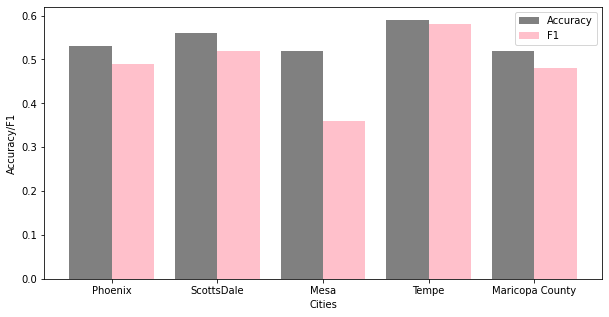

In [0]:
ind = np.arange(5)
width=0.4
# Figure size
plt.figure(figsize=(10,5))
plt.bar(ind,accuracy_no_reviews,color='#808080',width=width,label='Accuracy')
plt.bar(ind+width,f1_no_reviews,color='#FFC0CB',width=width,label='F1')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Cities')
# Figure size
plt.xticks(ind + width / 2, cities2)
plt.ylabel('Accuracy/F1')

In [0]:
norates_dataLoader = {}
for city in cities:
  norates_dataLoader[city] = sf.CustomDataLoader(all_dfs[city],drop_rate=True)
  
norates_data_dicts = {}
for city in cities:
  x,y =norates_dataLoader[city].resampledData()
  norates_data_dicts[city] = sf.generate_dict(x,y,device)

norates_trainable_dicts = {}
for city in cities:
  dict_hs = {}
  for hs in hidden_sizes2:
    dict_hs[hs] = sf.Trainable(norates_data_dicts[city],device,hs=hs,n_features=8)
  norates_trainable_dicts[city] = dict_hs

2545 1165
857 336
738 318
636 260
735 392
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8
Input_Size: 8


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [0]:
no_rates_acc_hs1 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  norates_trainable_dicts['phoenix'][hs].train()
  print('\n-----Training Complete-----\n')
  no_rates_acc_hs1.append(norates_trainable_dicts['phoenix'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.29575
Epoch: 1, loss: 0.30223
Epoch: 2, loss: 0.29985
Epoch: 3, loss: 0.29902
Epoch: 4, loss: 0.30300
Epoch: 5, loss: 0.30282
Epoch: 6, loss: 0.29649
Epoch: 7, loss: 0.29692
Epoch: 8, loss: 0.30007
Epoch: 9, loss: 0.30193

-----Training Complete-----

[[541   0]
 [477   0]]
accuracy:  0.5314341846758349
Report
               precision    recall  f1-score   support

         0.0       0.53      1.00      0.69       541
         1.0       0.00      0.00      0.00       477

    accuracy                           0.53      1018
   macro avg       0.27      0.50      0.35      1018
weighted avg       0.28      0.53      0.37      1018


-----Start Training-----
-----Hidden Size: 16 -----



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0, loss: 0.30849
Epoch: 1, loss: 0.30283
Epoch: 2, loss: 0.30348
Epoch: 3, loss: 0.30206
Epoch: 4, loss: 0.30312
Epoch: 5, loss: 0.30104
Epoch: 6, loss: 0.30617
Epoch: 7, loss: 0.30095
Epoch: 8, loss: 0.30873
Epoch: 9, loss: 0.30414

-----Training Complete-----

[[541   0]
 [477   0]]
accuracy:  0.5314341846758349
Report
               precision    recall  f1-score   support

         0.0       0.53      1.00      0.69       541
         1.0       0.00      0.00      0.00       477

    accuracy                           0.53      1018
   macro avg       0.27      0.50      0.35      1018
weighted avg       0.28      0.53      0.37      1018



In [0]:
no_rates_acc_hs2 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  norates_trainable_dicts['scot'][hs].train()
  print('\n-----Training Complete-----\n')
  no_rates_acc_hs2.append(norates_trainable_dicts['scot'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.30714
Epoch: 1, loss: 0.30992
Epoch: 2, loss: 0.30097
Epoch: 3, loss: 0.30302
Epoch: 4, loss: 0.30701
Epoch: 5, loss: 0.30183
Epoch: 6, loss: 0.30148
Epoch: 7, loss: 0.29356
Epoch: 8, loss: 0.29289
Epoch: 9, loss: 0.30194

-----Training Complete-----

[[178   0]
 [163   2]]
accuracy:  0.5247813411078717
Report
               precision    recall  f1-score   support

         0.0       0.52      1.00      0.69       178
         1.0       1.00      0.01      0.02       165

    accuracy                           0.52       343
   macro avg       0.76      0.51      0.35       343
weighted avg       0.75      0.52      0.37       343


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.30799
Epoch: 1, loss: 0.30537
Epoch: 2, loss: 0.30952
Epoch: 3, loss: 0.31366
Epoch: 4, loss: 0.29383
Epoch: 5, loss: 0.29688
Epoch: 6, loss: 0.30278
Epoch: 7, loss: 0.29565
Epoch: 8, loss: 0.29687
Epoch: 9, loss: 0.29718

-----Training Complete-----

[[164  14]
 [149  16]]
accuracy:  0.5247813411078717
Report
               precision    recall  f1-score   support

         0.0       0.52      0.92      0.67       178
         1.0       0.53      0.10      0.16       165

    accuracy                           0.52       343
   macro avg       0.53      0.51      0.42       343
weighted avg       0.53      0.52      0.43       343



In [0]:
no_rates_acc_hs3 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  norates_trainable_dicts['mesa'][hs].train()
  print('\n-----Training Complete-----\n')
  no_rates_acc_hs3.append(norates_trainable_dicts['mesa'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.46402
Epoch: 1, loss: 0.30620
Epoch: 2, loss: 0.30822
Epoch: 3, loss: 0.29404
Epoch: 4, loss: 0.28894
Epoch: 5, loss: 0.30401
Epoch: 6, loss: 0.29390
Epoch: 7, loss: 0.29646
Epoch: 8, loss: 0.28904
Epoch: 9, loss: 0.29862

-----Training Complete-----

[[148   0]
 [148   0]]
accuracy:  0.5
Report
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       148
         1.0       0.00      0.00      0.00       148

    accuracy                           0.50       296
   macro avg       0.25      0.50      0.33       296
weighted avg       0.25      0.50      0.33       296


-----Start Training-----
-----Hidden Size: 16 -----



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0, loss: 0.33797
Epoch: 1, loss: 0.30764
Epoch: 2, loss: 0.30106
Epoch: 3, loss: 0.29809
Epoch: 4, loss: 0.29843
Epoch: 5, loss: 0.30148
Epoch: 6, loss: 0.29502
Epoch: 7, loss: 0.27878
Epoch: 8, loss: 0.31402
Epoch: 9, loss: 0.28718

-----Training Complete-----

[[148   0]
 [148   0]]
accuracy:  0.5
Report
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       148
         1.0       0.00      0.00      0.00       148

    accuracy                           0.50       296
   macro avg       0.25      0.50      0.33       296
weighted avg       0.25      0.50      0.33       296



In [0]:
no_rates_acc_hs4 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  norates_trainable_dicts['tempe'][hs].train()
  print('\n-----Training Complete-----\n')
  no_rates_acc_hs4.append(norates_trainable_dicts['tempe'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.30864
Epoch: 1, loss: 0.29460
Epoch: 2, loss: 0.30241
Epoch: 3, loss: 0.30058
Epoch: 4, loss: 0.29554
Epoch: 5, loss: 0.28963
Epoch: 6, loss: 0.29994
Epoch: 7, loss: 0.30332
Epoch: 8, loss: 0.29855
Epoch: 9, loss: 0.29164

-----Training Complete-----

[[121   1]
 [128   5]]
accuracy:  0.49411764705882355
Report
               precision    recall  f1-score   support

         0.0       0.49      0.99      0.65       122
         1.0       0.83      0.04      0.07       133

    accuracy                           0.49       255
   macro avg       0.66      0.51      0.36       255
weighted avg       0.67      0.49      0.35       255


-----Start Training-----
-----Hidden Size: 16 -----



Epoch: 0, loss: 0.32910
Epoch: 1, loss: 0.29048
Epoch: 2, loss: 0.30172
Epoch: 3, loss: 0.28553
Epoch: 4, loss: 0.29916
Epoch: 5, loss: 0.28798
Epoch: 6, loss: 0.30230
Epoch: 7, loss: 0.29913
Epoch: 8, loss: 0.30065
Epoch: 9, loss: 0.28314

-----Training Complete-----

[[119   3]
 [131   2]]
accuracy:  0.4745098039215686
Report
               precision    recall  f1-score   support

         0.0       0.48      0.98      0.64       122
         1.0       0.40      0.02      0.03       133

    accuracy                           0.47       255
   macro avg       0.44      0.50      0.33       255
weighted avg       0.44      0.47      0.32       255



In [0]:
no_rates_acc_hs5 = []
for hs in hidden_sizes2:
  print("\n-----Start Training-----")
  print("-----Hidden Size:",hs,'-----\n') 
  norates_trainable_dicts['maricopa'][hs].train()
  print('\n-----Training Complete-----\n')
  no_rates_acc_hs5.append(norates_trainable_dicts['maricopa'][hs].test_printout())


-----Start Training-----
-----Hidden Size: 4 -----



Epoch: 0, loss: 0.31760
Epoch: 1, loss: 0.29074
Epoch: 2, loss: 0.31668
Epoch: 3, loss: 0.31024
Epoch: 4, loss: 0.30051
Epoch: 5, loss: 0.29077
Epoch: 6, loss: 0.30850
Epoch: 7, loss: 0.29581
Epoch: 8, loss: 0.30432
Epoch: 9, loss: 0.29202

-----Training Complete-----

[[151   0]
 [143   0]]
accuracy:  0.5136054421768708
Report
               precision    recall  f1-score   support

         0.0       0.51      1.00      0.68       151
         1.0       0.00      0.00      0.00       143

    accuracy                           0.51       294
   macro avg       0.26      0.50      0.34       294
weighted avg       0.26      0.51      0.35       294


-----Start Training-----
-----Hidden Size: 16 -----



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch: 0, loss: 0.31416
Epoch: 1, loss: 0.29719
Epoch: 2, loss: 0.29435
Epoch: 3, loss: 0.30219
Epoch: 4, loss: 0.30852
Epoch: 5, loss: 0.29461
Epoch: 6, loss: 0.30002
Epoch: 7, loss: 0.30247
Epoch: 8, loss: 0.29877
Epoch: 9, loss: 0.31080

-----Training Complete-----

[[151   0]
 [143   0]]
accuracy:  0.5136054421768708
Report
               precision    recall  f1-score   support

         0.0       0.51      1.00      0.68       151
         1.0       0.00      0.00      0.00       143

    accuracy                           0.51       294
   macro avg       0.26      0.50      0.34       294
weighted avg       0.26      0.51      0.35       294



Text(0, 0.5, 'Accuracy/F1')

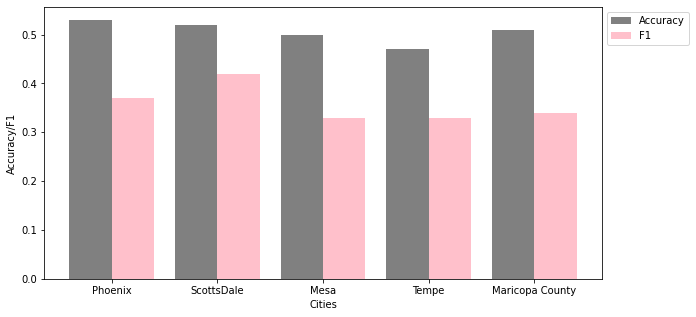

In [0]:
accuracy_no_rates = [
    0.53,
    0.52, 
    0.50,
    0.47,  
    0.51 
]

f1_no_rates = [
     0.37,
     0.42,
     0.33,
     0.33,     
     0.34 
]

cities2 =[
    'Phoenix',
    'ScottsDale',
    'Mesa',
    'Tempe',
    'Maricopa County'
]
ind = np.arange(5)
width=0.4
# Figure size
plt.figure(figsize=(10,5))
plt.bar(ind,accuracy_no_rates,color='#808080',width=width,label='Accuracy')
plt.bar(ind+width,f1_no_rates,color='#FFC0CB',width=width,label='F1')
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Cities')
# Figure size
plt.xticks(ind + width / 2, cities2)
plt.ylabel('Accuracy/F1')